In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [3]:
import missingno

In [4]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [9]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

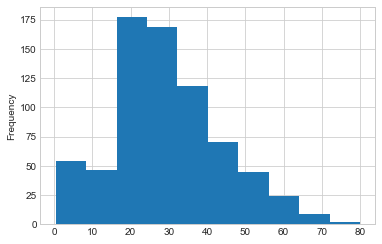

In [10]:
train.Age.plot.hist()

In [11]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [12]:
gender_submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [13]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

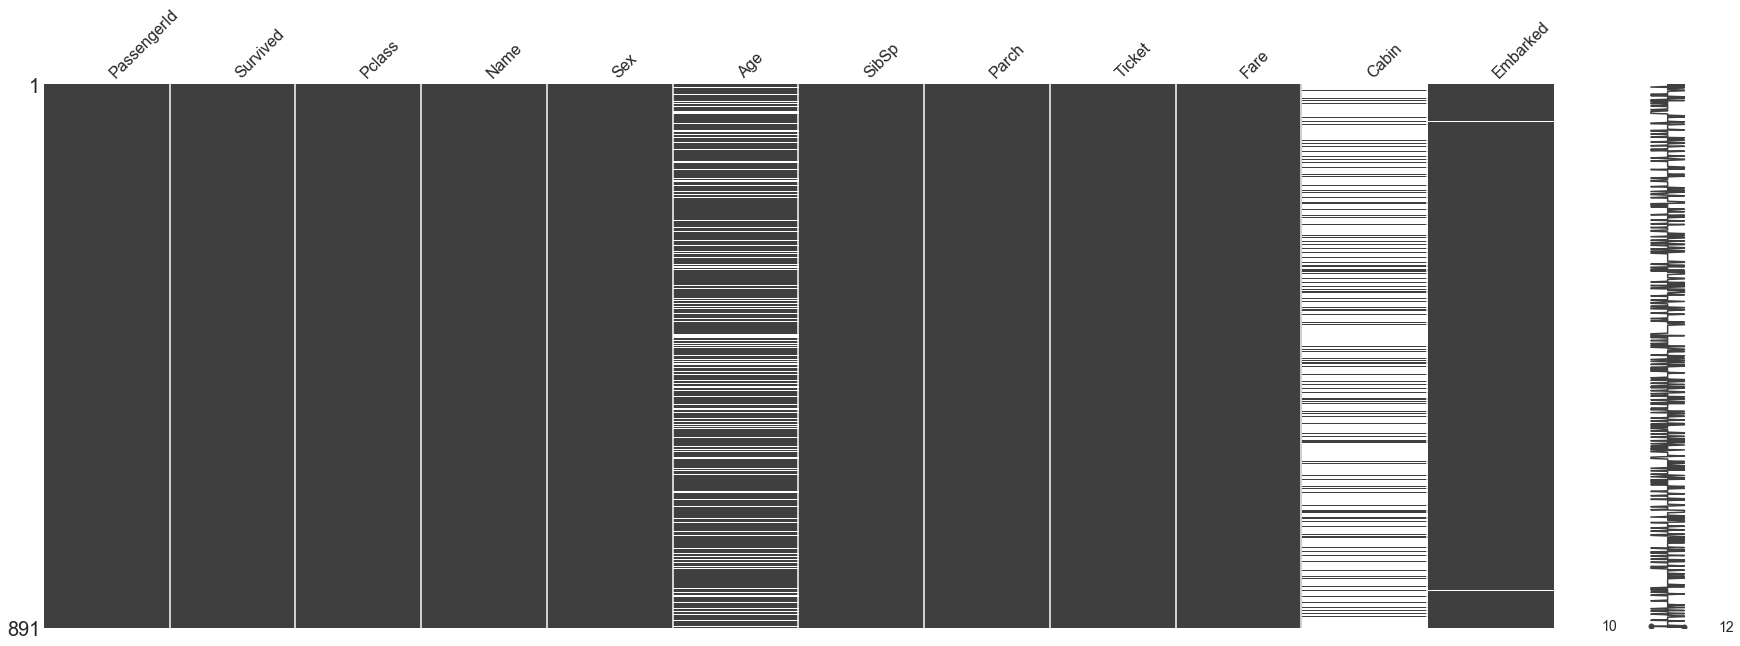

In [14]:
missingno.matrix(train,figsize=(30,10))

In [15]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df_bin = pd.DataFrame()
df_con = pd.DataFrame()

In [17]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
train.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

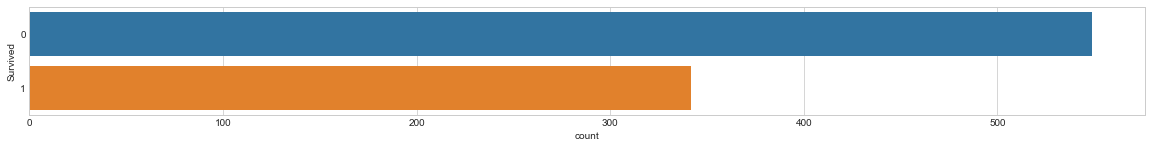

In [19]:
fig = plt.figure(figsize=(20,2))
sns.countplot(y='Survived',data=train)

In [20]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [21]:
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [22]:
df_bin.head()

Survived
0         0
1         1
2         1
3         1
4         0

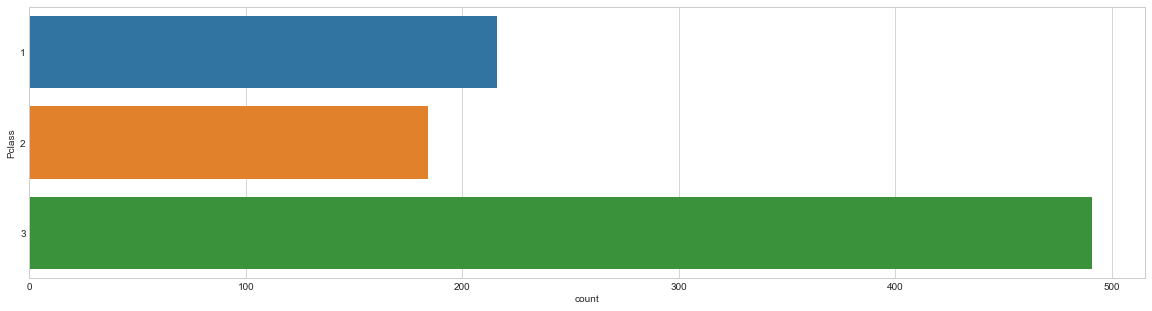

In [23]:
fig = plt.figure(figsize=(20,5))
sns.countplot(y='Pclass',data=train)

In [24]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [25]:
train.Pclass.isnull().sum()

0

In [26]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

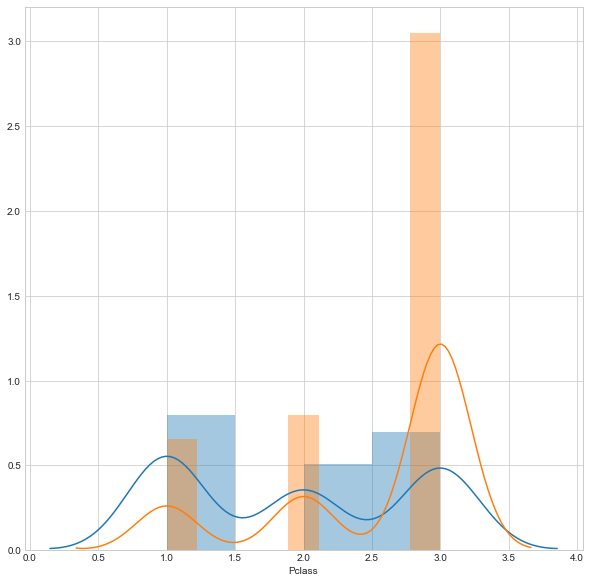

In [27]:
fig = plt.figure(figsize=(10,10))
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Pclass'])
sns.distplot(df_bin.loc[df_bin['Survived']==0]['Pclass'])

In [28]:
df_bin.head()

Survived  Pclass
0         0       3
1         1       1
2         1       3
3         1       1
4         0       3

In [29]:
train.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [30]:
train.Name.value_counts()

Richards, Master. William Rowe                   1
Chibnall, Mrs. (Edith Martha Bowerman)           1
Caldwell, Master. Alden Gates                    1
Ohman, Miss. Velin                               1
Shelley, Mrs. William (Imanita Parrish Hall)     1
Madill, Miss. Georgette Alexandra                1
Baxter, Mr. Quigg Edmond                         1
Jermyn, Miss. Annie                              1
Gronnestad, Mr. Daniel Danielsen                 1
McGough, Mr. James Robert                        1
Goldenberg, Mr. Samuel L                         1
Graham, Mrs. William Thompson (Edith Junkins)    1
Ryerson, Miss. Emily Borie                       1
Meyer, Mr. August                                1
McKane, Mr. Peter David                          1
Moore, Mr. Leonard Charles                       1
Stanley, Mr. Edward Roland                       1
Butler, Mr. Reginald Fenton                      1
Vander Planke, Mr. Leo Edmondus                  1
Abbing, Mr. Anthony            

In [31]:
train.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

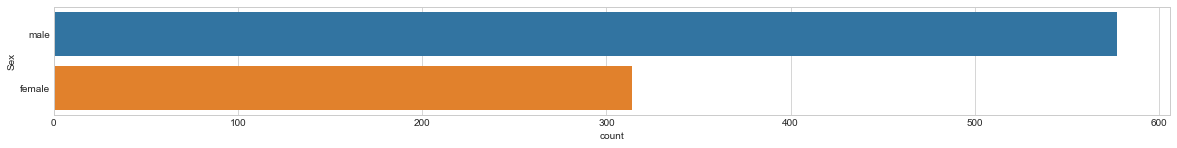

In [32]:
fig = plt.figure(figsize=(20,2))
sns.countplot(y='Sex',data=train)

In [33]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [34]:
train.Sex.isnull().sum()

0

In [35]:
df_bin['Sex'] = train['Sex']
df_con['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex']=='female',1,0)

In [36]:
df_bin.head()

Survived  Pclass  Sex
0         0       3    0
1         1       1    1
2         1       3    1
3         1       1    1
4         0       3    0

In [37]:
df_con.head()

Survived  Pclass     Sex
0         0       3    male
1         1       1  female
2         1       3  female
3         1       1  female
4         0       3    male

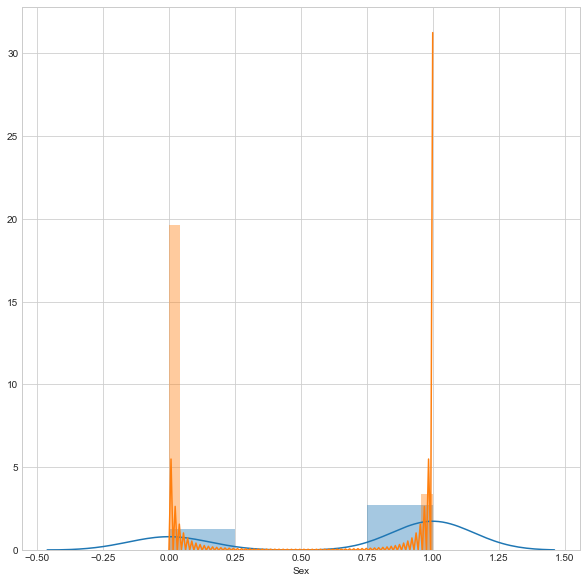

In [38]:
fig = plt.figure(figsize=(10,10))
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Sex'])
sns.distplot(df_bin.loc[df_bin['Survived']==0]['Sex'])

In [39]:
df_bin.loc[df_bin['Survived']==1]['Sex'].value_counts()

1    233
0    109
Name: Sex, dtype: int64

In [40]:
train.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [41]:
train.Age.isnull().sum()

177

In [43]:
train.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [44]:
train.SibSp.isnull().sum()

0

In [45]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

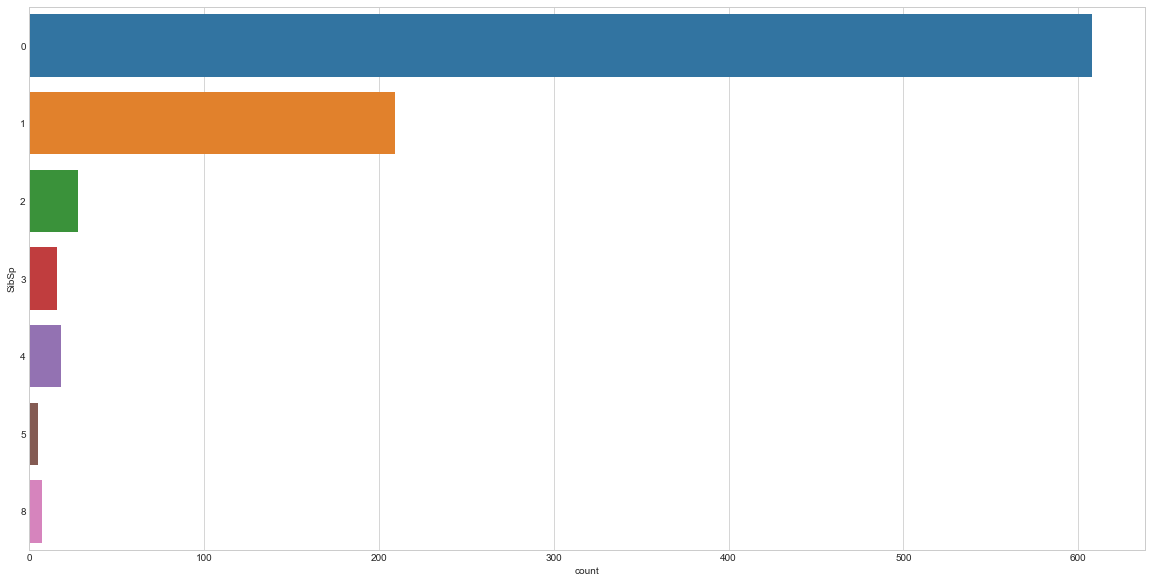

In [46]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y='SibSp',data=train)

In [47]:
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

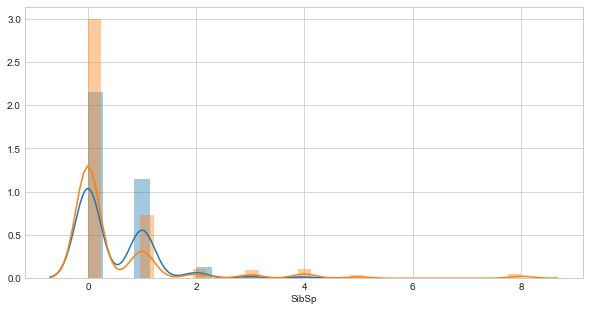

In [48]:
fig = plt.figure(figsize=(10,5))
sns.distplot(df_bin.loc[df_bin['Survived']==1]['SibSp'])
sns.distplot(df_bin.loc[df_bin['Survived']==0]['SibSp'])

In [49]:
train.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [50]:
train.Parch.isnull().sum()

0

In [51]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

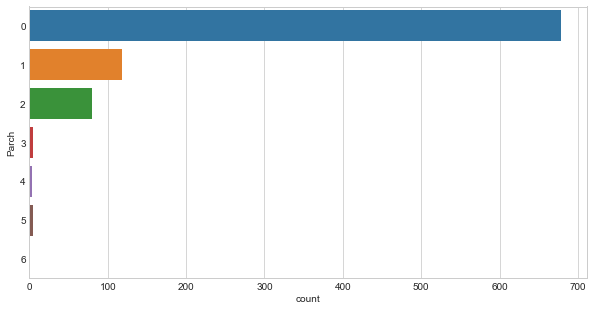

In [52]:
fig = plt.figure(figsize=(10,5))
sns.countplot(y='Parch',data=train)

In [53]:
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

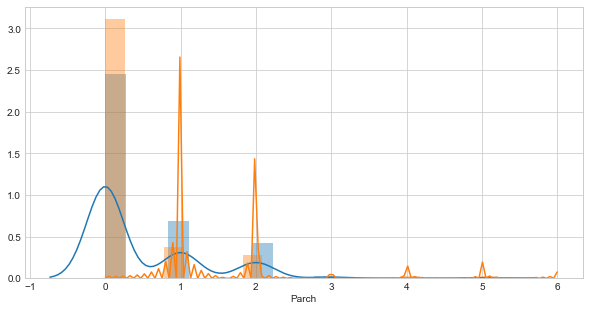

In [54]:
fig = plt.figure(figsize=(10,5))
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Parch'])
sns.distplot(df_bin.loc[df_bin['Survived']==0]['Parch'])

In [55]:
train.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [56]:
train.Ticket.isnull().sum()

0

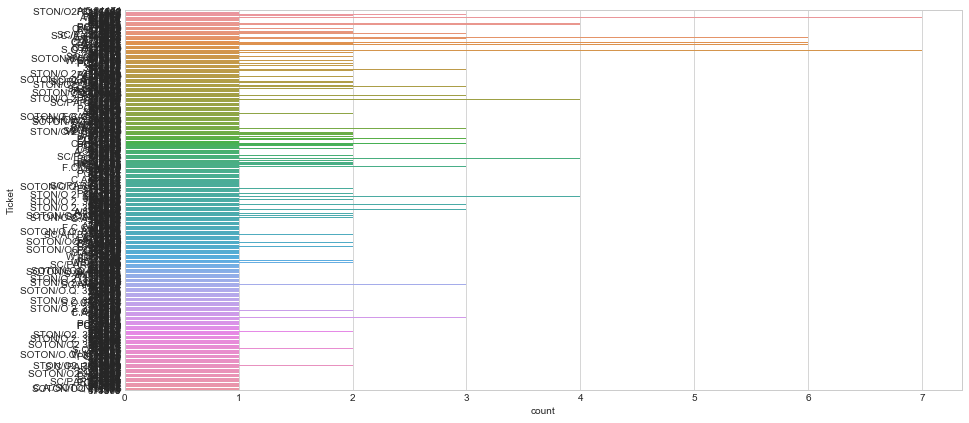

In [57]:
fig = plt.figure(figsize=(15,7))
sns.countplot(y='Ticket',data=train)

In [58]:
train.Ticket.value_counts()

347082           7
CA. 2343         7
1601             7
3101295          6
CA 2144          6
347088           6
S.O.C. 14879     5
382652           5
347077           4
113781           4
PC 17757         4
2666             4
LINE             4
113760           4
19950            4
349909           4
4133             4
W./C. 6608       4
17421            4
PC 17582         3
F.C.C. 13529     3
SC/Paris 2123    3
371110           3
C.A. 31921       3
PC 17760         3
345773           3
110413           3
35273            3
248727           3
29106            3
                ..
350035           1
349203           1
C.A. 29395       1
C.A. 29566       1
239854           1
113055           1
350047           1
2687             1
PC 17610         1
C.A. 17248       1
349216           1
349249           1
PC 17318         1
211536           1
347743           1
349209           1
13049            1
240929           1
113043           1
4136             1
349217           1
113028      

In [59]:
len(train.Ticket.unique())

681

In [60]:
train.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [61]:
train.Fare.dtype

dtype('float64')

In [62]:
len(train.Ticket.unique())

681

In [63]:
df_bin['Fare'] = pd.cut(train['Fare'],5)
df_bin.head()

Survived  Pclass  Sex  SibSp  Parch               Fare
0         0       3    0      1      0  (-0.512, 102.466]
1         1       1    1      1      0  (-0.512, 102.466]
2         1       3    1      0      0  (-0.512, 102.466]
3         1       1    1      1      0  (-0.512, 102.466]
4         0       3    0      0      0  (-0.512, 102.466]

In [64]:
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

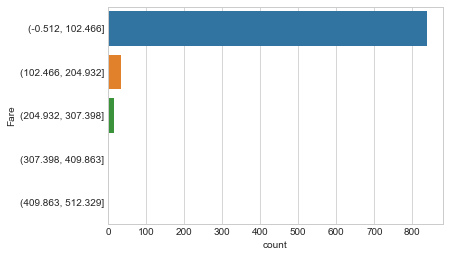

In [65]:
sns.countplot(y='Fare',data=df_bin)

In [66]:
df_bin.head()

Survived  Pclass  Sex  SibSp  Parch               Fare
0         0       3    0      1      0  (-0.512, 102.466]
1         1       1    1      1      0  (-0.512, 102.466]
2         1       3    1      0      0  (-0.512, 102.466]
3         1       1    1      1      0  (-0.512, 102.466]
4         0       3    0      0      0  (-0.512, 102.466]

In [67]:
train.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [68]:
train.Cabin.isnull().sum()

687

In [69]:
len(train.Cabin.unique())

148

In [70]:
train.Embarked.isnull().sum()

2

In [71]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [72]:
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [73]:
len(df_bin)

891

In [74]:
df_bin = df_bin.dropna(subset=['Embarked'])
df_con = df_con.dropna(subset=['Embarked'])

In [75]:
len(df_bin)

889

In [76]:
df_bin.head()

Survived  Pclass  Sex  SibSp  Parch               Fare Embarked
0         0       3    0      1      0  (-0.512, 102.466]        S
1         1       1    1      1      0  (-0.512, 102.466]        C
2         1       3    1      0      0  (-0.512, 102.466]        S
3         1       1    1      1      0  (-0.512, 102.466]        S
4         0       3    0      0      0  (-0.512, 102.466]        S

In [77]:
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
one_hot_cols

['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [78]:
df_bin_encoded = pd.get_dummies(df_bin,columns=one_hot_cols)

In [79]:
df_bin_encoded.head()

Survived  Pclass_1  Pclass_2  Pclass_3  Sex_0  Sex_1  SibSp_0  SibSp_1  \
0         0         0         0         1      1      0        0        1   
1         1         1         0         0      0      1        0        1   
2         1         0         0         1      0      1        1        0   
3         1         1         0         0      0      1        0        1   
4         0         0         0         1      1      0        1        0   

   SibSp_2  SibSp_3  ...  Parch_5  Parch_6  Fare_(-0.512, 102.466]  \
0        0        0  ...        0        0                       1   
1        0        0  ...        0        0                       1   
2        0        0  ...        0        0                       1   
3        0        0  ...        0        0                       1   
4        0        0  ...        0        0                       1   

   Fare_(102.466, 204.932]  Fare_(204.932, 307.398]  Fare_(307.398, 409.863]  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   Fare_(409.863, 512.329]  Embarked_C  Embarked_Q  Embarked_S  
0                        0           0           0           1  
1                        0           1           0           0  
2                        0           0           0           1  
3                        0           0           0           1  
4                        0           0           0           1  

[5 rows x 28 columns]

In [80]:
df_con['Fare']=train['Fare']

In [81]:
df_con.head()

Survived  Pclass     Sex  SibSp  Parch Embarked     Fare
0         0       3    male      1      0        S   7.2500
1         1       1  female      1      0        C  71.2833
2         1       3  female      0      0        S   7.9250
3         1       1  female      1      0        S  53.1000
4         0       3    male      0      0        S   8.0500

In [82]:

# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [83]:
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [84]:
df_con_enc.head()

Survived  SibSp  Parch     Fare  embarked_C  embarked_Q  embarked_S  \
0         0      1      0   7.2500           0           0           1   
1         1      1      0  71.2833           1           0           0   
2         1      0      0   7.9250           0           0           1   
3         1      1      0  53.1000           0           0           1   
4         0      0      0   8.0500           0           0           1   

   sex_female  sex_male  pclass_1  pclass_2  pclass_3  
0           0         1         0         0         1  
1           1         0         1         0         0  
2           1         0         0         0         1  
3           1         0         1         0         0  
4           0         1         0         0         1

In [85]:
selected_df = df_con_enc

In [86]:
selected_df.head()

Survived  SibSp  Parch     Fare  embarked_C  embarked_Q  embarked_S  \
0         0      1      0   7.2500           0           0           1   
1         1      1      0  71.2833           1           0           0   
2         1      0      0   7.9250           0           0           1   
3         1      1      0  53.1000           0           0           1   
4         0      0      0   8.0500           0           0           1   

   sex_female  sex_male  pclass_1  pclass_2  pclass_3  
0           0         1         0         0         1  
1           1         0         1         0         0  
2           1         0         0         0         1  
3           1         0         1         0         0  
4           0         1         0         0         1

In [87]:
X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

In [88]:
X_train.shape

(889, 11)

In [89]:
y_train.shape

(889,)

In [90]:
model = LogisticRegression()

In [91]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [92]:
acc = model.score(X_train,y_train)*100
acc

79.97750281214849

In [93]:
from sklearn.model_selection import cross_val_score

In [97]:
scores = cross_val_score(model,X_train,y_train,cv=5)
scores.mean()

0.7885545610359931

In [98]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
acc = model.score(X_train,y_train)*100
scores = cross_val_score(model,X_train,y_train,cv=5)

In [99]:
acc

83.46456692913385

In [101]:
scores

array([0.71910112, 0.71348315, 0.83707865, 0.78651685, 0.76836158])

In [102]:
scores.mean()

0.7649082714403606

In [103]:
model = GaussianNB()
model.fit(X_train,y_train)
acc = model.score(X_train,y_train)*100
scores = cross_val_score(model,X_train,y_train,cv=5)

In [104]:
acc

78.51518560179977

In [105]:
scores.mean()

0.7818066400050784

In [106]:
model = LinearSVC()
model.fit(X_train,y_train)
acc = model.score(X_train,y_train)*100
scores = cross_val_score(model,X_train,y_train,cv=5)

In [107]:
acc

78.51518560179977

In [108]:
scores.mean()

0.7795594489938426

In [109]:
model = SGDClassifier()
model.fit(X_train,y_train)
acc = model.score(X_train,y_train)*100
scores = cross_val_score(model,X_train,y_train,cv=5)

In [110]:
acc

61.754780652418454

In [111]:
scores.mean()

0.6413508538056243

In [112]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
acc = model.score(X_train,y_train)*100
scores = cross_val_score(model,X_train,y_train,cv=5)

In [113]:
acc

92.46344206974129

In [114]:
scores.mean()

0.7930489430584651

In [115]:
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
acc = model.score(X_train,y_train)*100
scores = cross_val_score(model,X_train,y_train,cv=5)

In [116]:
acc

86.61417322834646

In [117]:
scores.mean()

0.8087856281343238

In [118]:
X_train.head()

SibSp  Parch     Fare  embarked_C  embarked_Q  embarked_S  sex_female  \
0      1      0   7.2500           0           0           1           0   
1      1      0  71.2833           1           0           0           1   
2      0      0   7.9250           0           0           1           1   
3      1      0  53.1000           0           0           1           1   
4      0      0   8.0500           0           0           1           0   

   sex_male  pclass_1  pclass_2  pclass_3  
0         1         0         0         1  
1         0         1         0         0  
2         0         0         0         1  
3         0         1         0         0  
4         1         0         0         1

In [119]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [120]:
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [124]:
from catboost import CatBoostClassifier, Pool, cv

In [125]:
train_pool = Pool(X_train,y_train,cat_features)

In [126]:
model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')
model.fit(train_pool,plot=True)
acc = model.score(X_train,y_train)*100
scores = cross_val_score(model,X_train,y_train,cv=5)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6862830	total: 153ms	remaining: 2m 33s
1:	learn: 0.6809444	total: 177ms	remaining: 1m 28s
2:	learn: 0.6751692	total: 235ms	remaining: 1m 17s
3:	learn: 0.6689060	total: 289ms	remaining: 1m 11s
4:	learn: 0.6632144	total: 319ms	remaining: 1m 3s
5:	learn: 0.6576488	total: 384ms	remaining: 1m 3s
6:	learn: 0.6544441	total: 392ms	remaining: 55.5s
7:	learn: 0.6490635	total: 429ms	remaining: 53.2s
8:	learn: 0.6443241	total: 468ms	remaining: 51.6s
9:	learn: 0.6395935	total: 519ms	remaining: 51.4s
10:	learn: 0.6345186	total: 575ms	remaining: 51.7s
11:	learn: 0.6305316	total: 605ms	remaining: 49.8s
12:	learn: 0.6275610	total: 615ms	remaining: 46.7s
13:	learn: 0.6225020	total: 681ms	remaining: 48s
14:	learn: 0.6179503	total: 704ms	remaining: 46.2s
15:	learn: 0.6140480	total: 713ms	remaining: 43.9s
16:	learn: 0.6100034	total: 740ms	remaining: 42.8s
17:	learn: 0.6049646	total: 771ms	remaining: 42s
18:	learn: 0.6025760	total: 778ms	remaining: 40.1s
19:	learn: 

165:	learn: 0.4227463	total: 4.27s	remaining: 21.5s
166:	learn: 0.4226186	total: 4.32s	remaining: 21.5s
167:	learn: 0.4222141	total: 4.36s	remaining: 21.6s
168:	learn: 0.4219366	total: 4.38s	remaining: 21.6s
169:	learn: 0.4216245	total: 4.41s	remaining: 21.5s
170:	learn: 0.4213900	total: 4.42s	remaining: 21.4s
171:	learn: 0.4210836	total: 4.46s	remaining: 21.5s
172:	learn: 0.4208199	total: 4.5s	remaining: 21.5s
173:	learn: 0.4206421	total: 4.53s	remaining: 21.5s
174:	learn: 0.4201114	total: 4.55s	remaining: 21.5s
175:	learn: 0.4198212	total: 4.56s	remaining: 21.4s
176:	learn: 0.4195834	total: 4.58s	remaining: 21.3s
177:	learn: 0.4195685	total: 4.59s	remaining: 21.2s
178:	learn: 0.4194809	total: 4.6s	remaining: 21.1s
179:	learn: 0.4191368	total: 4.63s	remaining: 21.1s
180:	learn: 0.4185960	total: 4.66s	remaining: 21.1s
181:	learn: 0.4184559	total: 4.68s	remaining: 21s
182:	learn: 0.4180542	total: 4.69s	remaining: 20.9s
183:	learn: 0.4178579	total: 4.7s	remaining: 20.9s
184:	learn: 0.417

324:	learn: 0.3931290	total: 9.02s	remaining: 18.7s
325:	learn: 0.3930115	total: 9.05s	remaining: 18.7s
326:	learn: 0.3929436	total: 9.08s	remaining: 18.7s
327:	learn: 0.3928210	total: 9.15s	remaining: 18.7s
328:	learn: 0.3926321	total: 9.2s	remaining: 18.8s
329:	learn: 0.3926315	total: 9.21s	remaining: 18.7s
330:	learn: 0.3925085	total: 9.24s	remaining: 18.7s
331:	learn: 0.3921820	total: 9.28s	remaining: 18.7s
332:	learn: 0.3920570	total: 9.32s	remaining: 18.7s
333:	learn: 0.3918707	total: 9.37s	remaining: 18.7s
334:	learn: 0.3917635	total: 9.47s	remaining: 18.8s
335:	learn: 0.3916127	total: 9.52s	remaining: 18.8s
336:	learn: 0.3914735	total: 9.56s	remaining: 18.8s
337:	learn: 0.3914486	total: 9.58s	remaining: 18.8s
338:	learn: 0.3912764	total: 9.66s	remaining: 18.8s
339:	learn: 0.3911365	total: 9.7s	remaining: 18.8s
340:	learn: 0.3910828	total: 9.72s	remaining: 18.8s
341:	learn: 0.3910413	total: 9.74s	remaining: 18.7s
342:	learn: 0.3910351	total: 9.75s	remaining: 18.7s
343:	learn: 0.

487:	learn: 0.3777238	total: 14s	remaining: 14.7s
488:	learn: 0.3776655	total: 14s	remaining: 14.6s
489:	learn: 0.3776178	total: 14s	remaining: 14.6s
490:	learn: 0.3775500	total: 14s	remaining: 14.6s
491:	learn: 0.3774361	total: 14.1s	remaining: 14.5s
492:	learn: 0.3772670	total: 14.1s	remaining: 14.5s
493:	learn: 0.3771396	total: 14.1s	remaining: 14.5s
494:	learn: 0.3771236	total: 14.1s	remaining: 14.4s
495:	learn: 0.3770363	total: 14.2s	remaining: 14.4s
496:	learn: 0.3769634	total: 14.2s	remaining: 14.4s
497:	learn: 0.3769625	total: 14.2s	remaining: 14.4s
498:	learn: 0.3768613	total: 14.3s	remaining: 14.3s
499:	learn: 0.3768611	total: 14.3s	remaining: 14.3s
500:	learn: 0.3768153	total: 14.3s	remaining: 14.2s
501:	learn: 0.3767849	total: 14.3s	remaining: 14.2s
502:	learn: 0.3765500	total: 14.4s	remaining: 14.2s
503:	learn: 0.3763980	total: 14.4s	remaining: 14.2s
504:	learn: 0.3763692	total: 14.5s	remaining: 14.2s
505:	learn: 0.3763085	total: 14.5s	remaining: 14.2s
506:	learn: 0.376163

654:	learn: 0.3644178	total: 19.2s	remaining: 10.1s
655:	learn: 0.3642661	total: 19.3s	remaining: 10.1s
656:	learn: 0.3642146	total: 19.4s	remaining: 10.1s
657:	learn: 0.3642143	total: 19.4s	remaining: 10.1s
658:	learn: 0.3641970	total: 19.4s	remaining: 10s
659:	learn: 0.3641835	total: 19.4s	remaining: 10s
660:	learn: 0.3641783	total: 19.4s	remaining: 9.97s
661:	learn: 0.3640790	total: 19.4s	remaining: 9.93s
662:	learn: 0.3640602	total: 19.5s	remaining: 9.9s
663:	learn: 0.3639463	total: 19.5s	remaining: 9.86s
664:	learn: 0.3639302	total: 19.5s	remaining: 9.82s
665:	learn: 0.3638903	total: 19.5s	remaining: 9.78s
666:	learn: 0.3637239	total: 19.5s	remaining: 9.75s
667:	learn: 0.3635881	total: 19.5s	remaining: 9.71s
668:	learn: 0.3634772	total: 19.6s	remaining: 9.68s
669:	learn: 0.3634068	total: 19.6s	remaining: 9.65s
670:	learn: 0.3633759	total: 19.6s	remaining: 9.61s
671:	learn: 0.3631802	total: 19.6s	remaining: 9.59s
672:	learn: 0.3631026	total: 19.7s	remaining: 9.55s
673:	learn: 0.363

814:	learn: 0.3535737	total: 23.7s	remaining: 5.37s
815:	learn: 0.3534753	total: 23.7s	remaining: 5.34s
816:	learn: 0.3534687	total: 23.7s	remaining: 5.31s
817:	learn: 0.3534612	total: 23.7s	remaining: 5.28s
818:	learn: 0.3533902	total: 23.8s	remaining: 5.25s
819:	learn: 0.3533072	total: 23.8s	remaining: 5.22s
820:	learn: 0.3532730	total: 23.8s	remaining: 5.19s
821:	learn: 0.3531556	total: 23.8s	remaining: 5.16s
822:	learn: 0.3531526	total: 23.8s	remaining: 5.12s
823:	learn: 0.3530893	total: 23.9s	remaining: 5.09s
824:	learn: 0.3528000	total: 24s	remaining: 5.09s
825:	learn: 0.3527557	total: 24.1s	remaining: 5.08s
826:	learn: 0.3527494	total: 24.1s	remaining: 5.04s
827:	learn: 0.3527097	total: 24.2s	remaining: 5.02s
828:	learn: 0.3525818	total: 24.2s	remaining: 4.99s
829:	learn: 0.3525719	total: 24.2s	remaining: 4.96s
830:	learn: 0.3523327	total: 24.3s	remaining: 4.93s
831:	learn: 0.3523023	total: 24.3s	remaining: 4.91s
832:	learn: 0.3522949	total: 24.3s	remaining: 4.88s
833:	learn: 0.

975:	learn: 0.3415224	total: 29.5s	remaining: 724ms
976:	learn: 0.3415224	total: 29.5s	remaining: 694ms
977:	learn: 0.3414545	total: 29.5s	remaining: 663ms
978:	learn: 0.3413894	total: 29.5s	remaining: 633ms
979:	learn: 0.3413289	total: 29.5s	remaining: 603ms
980:	learn: 0.3412959	total: 29.6s	remaining: 572ms
981:	learn: 0.3412873	total: 29.6s	remaining: 542ms
982:	learn: 0.3411125	total: 29.6s	remaining: 512ms
983:	learn: 0.3410429	total: 29.7s	remaining: 482ms
984:	learn: 0.3408345	total: 29.7s	remaining: 452ms
985:	learn: 0.3407755	total: 29.7s	remaining: 422ms
986:	learn: 0.3405983	total: 29.7s	remaining: 392ms
987:	learn: 0.3404887	total: 29.8s	remaining: 362ms
988:	learn: 0.3404766	total: 29.8s	remaining: 331ms
989:	learn: 0.3404401	total: 29.8s	remaining: 301ms
990:	learn: 0.3403797	total: 30s	remaining: 272ms
991:	learn: 0.3403515	total: 30.1s	remaining: 243ms
992:	learn: 0.3402624	total: 30.2s	remaining: 213ms
993:	learn: 0.3402175	total: 30.2s	remaining: 182ms
994:	learn: 0.

142:	learn: 0.4193519	total: 1.64s	remaining: 9.81s
143:	learn: 0.4188342	total: 1.65s	remaining: 9.78s
144:	learn: 0.4184626	total: 1.65s	remaining: 9.76s
145:	learn: 0.4182075	total: 1.66s	remaining: 9.73s
146:	learn: 0.4178200	total: 1.67s	remaining: 9.71s
147:	learn: 0.4174750	total: 1.68s	remaining: 9.69s
148:	learn: 0.4173703	total: 1.69s	remaining: 9.64s
149:	learn: 0.4170084	total: 1.7s	remaining: 9.61s
150:	learn: 0.4164865	total: 1.71s	remaining: 9.59s
151:	learn: 0.4158638	total: 1.72s	remaining: 9.57s
152:	learn: 0.4157213	total: 1.72s	remaining: 9.54s
153:	learn: 0.4151611	total: 1.73s	remaining: 9.52s
154:	learn: 0.4146823	total: 1.74s	remaining: 9.5s
155:	learn: 0.4141996	total: 1.75s	remaining: 9.47s
156:	learn: 0.4137263	total: 1.76s	remaining: 9.45s
157:	learn: 0.4132893	total: 1.77s	remaining: 9.44s
158:	learn: 0.4128705	total: 1.79s	remaining: 9.46s
159:	learn: 0.4122598	total: 1.8s	remaining: 9.47s
160:	learn: 0.4118564	total: 1.82s	remaining: 9.47s
161:	learn: 0.4

309:	learn: 0.3806436	total: 3.23s	remaining: 7.19s
310:	learn: 0.3805165	total: 3.24s	remaining: 7.18s
311:	learn: 0.3804557	total: 3.25s	remaining: 7.17s
312:	learn: 0.3804018	total: 3.26s	remaining: 7.15s
313:	learn: 0.3803702	total: 3.27s	remaining: 7.14s
314:	learn: 0.3801907	total: 3.28s	remaining: 7.13s
315:	learn: 0.3800801	total: 3.29s	remaining: 7.12s
316:	learn: 0.3798602	total: 3.3s	remaining: 7.1s
317:	learn: 0.3796090	total: 3.31s	remaining: 7.09s
318:	learn: 0.3794590	total: 3.32s	remaining: 7.08s
319:	learn: 0.3792609	total: 3.33s	remaining: 7.07s
320:	learn: 0.3791331	total: 3.34s	remaining: 7.06s
321:	learn: 0.3791115	total: 3.34s	remaining: 7.04s
322:	learn: 0.3790587	total: 3.35s	remaining: 7.03s
323:	learn: 0.3788986	total: 3.36s	remaining: 7.02s
324:	learn: 0.3786678	total: 3.37s	remaining: 7.01s
325:	learn: 0.3785182	total: 3.38s	remaining: 7s
326:	learn: 0.3782451	total: 3.4s	remaining: 6.99s
327:	learn: 0.3779963	total: 3.4s	remaining: 6.98s
328:	learn: 0.37777

478:	learn: 0.3622146	total: 4.98s	remaining: 5.42s
479:	learn: 0.3621907	total: 4.99s	remaining: 5.41s
480:	learn: 0.3620943	total: 5s	remaining: 5.4s
481:	learn: 0.3620434	total: 5.01s	remaining: 5.39s
482:	learn: 0.3618324	total: 5.02s	remaining: 5.38s
483:	learn: 0.3617348	total: 5.04s	remaining: 5.37s
484:	learn: 0.3616371	total: 5.04s	remaining: 5.36s
485:	learn: 0.3615178	total: 5.05s	remaining: 5.34s
486:	learn: 0.3614688	total: 5.06s	remaining: 5.33s
487:	learn: 0.3614198	total: 5.07s	remaining: 5.32s
488:	learn: 0.3614190	total: 5.08s	remaining: 5.3s
489:	learn: 0.3613625	total: 5.08s	remaining: 5.29s
490:	learn: 0.3611803	total: 5.09s	remaining: 5.28s
491:	learn: 0.3611495	total: 5.1s	remaining: 5.27s
492:	learn: 0.3610698	total: 5.11s	remaining: 5.25s
493:	learn: 0.3609548	total: 5.12s	remaining: 5.25s
494:	learn: 0.3609080	total: 5.13s	remaining: 5.24s
495:	learn: 0.3608311	total: 5.15s	remaining: 5.23s
496:	learn: 0.3606948	total: 5.16s	remaining: 5.22s
497:	learn: 0.3606

639:	learn: 0.3475073	total: 6.6s	remaining: 3.71s
640:	learn: 0.3473319	total: 6.61s	remaining: 3.7s
641:	learn: 0.3471448	total: 6.62s	remaining: 3.69s
642:	learn: 0.3470358	total: 6.63s	remaining: 3.68s
643:	learn: 0.3468475	total: 6.64s	remaining: 3.67s
644:	learn: 0.3468112	total: 6.65s	remaining: 3.66s
645:	learn: 0.3467801	total: 6.66s	remaining: 3.65s
646:	learn: 0.3466825	total: 6.67s	remaining: 3.64s
647:	learn: 0.3465227	total: 6.67s	remaining: 3.63s
648:	learn: 0.3464779	total: 6.68s	remaining: 3.62s
649:	learn: 0.3464245	total: 6.69s	remaining: 3.6s
650:	learn: 0.3463996	total: 6.71s	remaining: 3.59s
651:	learn: 0.3463676	total: 6.71s	remaining: 3.58s
652:	learn: 0.3462787	total: 6.72s	remaining: 3.57s
653:	learn: 0.3462371	total: 6.74s	remaining: 3.56s
654:	learn: 0.3461858	total: 6.75s	remaining: 3.55s
655:	learn: 0.3460237	total: 6.76s	remaining: 3.54s
656:	learn: 0.3459056	total: 6.77s	remaining: 3.53s
657:	learn: 0.3458735	total: 6.78s	remaining: 3.52s
658:	learn: 0.3

808:	learn: 0.3327355	total: 8.37s	remaining: 1.98s
809:	learn: 0.3326809	total: 8.38s	remaining: 1.97s
810:	learn: 0.3325783	total: 8.39s	remaining: 1.96s
811:	learn: 0.3324156	total: 8.4s	remaining: 1.94s
812:	learn: 0.3323905	total: 8.41s	remaining: 1.93s
813:	learn: 0.3323592	total: 8.42s	remaining: 1.92s
814:	learn: 0.3323269	total: 8.43s	remaining: 1.91s
815:	learn: 0.3323231	total: 8.43s	remaining: 1.9s
816:	learn: 0.3322029	total: 8.44s	remaining: 1.89s
817:	learn: 0.3321309	total: 8.45s	remaining: 1.88s
818:	learn: 0.3320425	total: 8.46s	remaining: 1.87s
819:	learn: 0.3320082	total: 8.47s	remaining: 1.86s
820:	learn: 0.3319397	total: 8.48s	remaining: 1.85s
821:	learn: 0.3318495	total: 8.49s	remaining: 1.84s
822:	learn: 0.3317398	total: 8.5s	remaining: 1.83s
823:	learn: 0.3315766	total: 8.51s	remaining: 1.82s
824:	learn: 0.3314745	total: 8.51s	remaining: 1.81s
825:	learn: 0.3314040	total: 8.52s	remaining: 1.79s
826:	learn: 0.3313235	total: 8.53s	remaining: 1.78s
827:	learn: 0.3

980:	learn: 0.3170782	total: 10.2s	remaining: 198ms
981:	learn: 0.3170080	total: 10.2s	remaining: 187ms
982:	learn: 0.3168716	total: 10.2s	remaining: 177ms
983:	learn: 0.3167586	total: 10.2s	remaining: 167ms
984:	learn: 0.3166036	total: 10.3s	remaining: 156ms
985:	learn: 0.3165666	total: 10.3s	remaining: 146ms
986:	learn: 0.3164817	total: 10.3s	remaining: 135ms
987:	learn: 0.3163909	total: 10.3s	remaining: 125ms
988:	learn: 0.3163286	total: 10.3s	remaining: 115ms
989:	learn: 0.3162779	total: 10.3s	remaining: 104ms
990:	learn: 0.3161686	total: 10.3s	remaining: 93.7ms
991:	learn: 0.3161092	total: 10.3s	remaining: 83.3ms
992:	learn: 0.3159389	total: 10.3s	remaining: 72.9ms
993:	learn: 0.3158045	total: 10.3s	remaining: 62.5ms
994:	learn: 0.3157846	total: 10.4s	remaining: 52ms
995:	learn: 0.3156789	total: 10.4s	remaining: 41.7ms
996:	learn: 0.3156126	total: 10.4s	remaining: 31.3ms
997:	learn: 0.3154338	total: 10.4s	remaining: 20.9ms
998:	learn: 0.3153072	total: 10.4s	remaining: 10.4ms
999:	

140:	learn: 0.4076613	total: 1.27s	remaining: 7.76s
141:	learn: 0.4071761	total: 1.28s	remaining: 7.74s
142:	learn: 0.4067447	total: 1.29s	remaining: 7.73s
143:	learn: 0.4063363	total: 1.3s	remaining: 7.72s
144:	learn: 0.4059250	total: 1.31s	remaining: 7.71s
145:	learn: 0.4056517	total: 1.32s	remaining: 7.7s
146:	learn: 0.4053566	total: 1.32s	remaining: 7.67s
147:	learn: 0.4049335	total: 1.33s	remaining: 7.66s
148:	learn: 0.4047900	total: 1.34s	remaining: 7.64s
149:	learn: 0.4043127	total: 1.34s	remaining: 7.62s
150:	learn: 0.4040648	total: 1.35s	remaining: 7.61s
151:	learn: 0.4034280	total: 1.36s	remaining: 7.6s
152:	learn: 0.4030273	total: 1.37s	remaining: 7.6s
153:	learn: 0.4025588	total: 1.38s	remaining: 7.59s
154:	learn: 0.4024033	total: 1.39s	remaining: 7.59s
155:	learn: 0.4019987	total: 1.4s	remaining: 7.58s
156:	learn: 0.4016466	total: 1.41s	remaining: 7.56s
157:	learn: 0.4012050	total: 1.42s	remaining: 7.55s
158:	learn: 0.4005242	total: 1.43s	remaining: 7.54s
159:	learn: 0.400

314:	learn: 0.3643235	total: 2.87s	remaining: 6.23s
315:	learn: 0.3641835	total: 2.87s	remaining: 6.22s
316:	learn: 0.3638507	total: 2.88s	remaining: 6.21s
317:	learn: 0.3637551	total: 2.89s	remaining: 6.2s
318:	learn: 0.3635908	total: 2.9s	remaining: 6.19s
319:	learn: 0.3634908	total: 2.91s	remaining: 6.18s
320:	learn: 0.3633560	total: 2.92s	remaining: 6.17s
321:	learn: 0.3632833	total: 2.93s	remaining: 6.16s
322:	learn: 0.3631785	total: 2.94s	remaining: 6.15s
323:	learn: 0.3629970	total: 2.94s	remaining: 6.14s
324:	learn: 0.3629178	total: 2.95s	remaining: 6.13s
325:	learn: 0.3627286	total: 2.96s	remaining: 6.12s
326:	learn: 0.3626236	total: 2.97s	remaining: 6.11s
327:	learn: 0.3625809	total: 2.98s	remaining: 6.1s
328:	learn: 0.3624344	total: 2.99s	remaining: 6.09s
329:	learn: 0.3623415	total: 3s	remaining: 6.08s
330:	learn: 0.3621628	total: 3s	remaining: 6.07s
331:	learn: 0.3620356	total: 3.01s	remaining: 6.06s
332:	learn: 0.3619180	total: 3.02s	remaining: 6.05s
333:	learn: 0.3617462

478:	learn: 0.3446393	total: 4.29s	remaining: 4.67s
479:	learn: 0.3444689	total: 4.3s	remaining: 4.66s
480:	learn: 0.3442020	total: 4.31s	remaining: 4.65s
481:	learn: 0.3441404	total: 4.32s	remaining: 4.64s
482:	learn: 0.3440919	total: 4.33s	remaining: 4.63s
483:	learn: 0.3439729	total: 4.34s	remaining: 4.62s
484:	learn: 0.3439316	total: 4.34s	remaining: 4.61s
485:	learn: 0.3438652	total: 4.35s	remaining: 4.6s
486:	learn: 0.3438165	total: 4.36s	remaining: 4.59s
487:	learn: 0.3437299	total: 4.37s	remaining: 4.58s
488:	learn: 0.3436376	total: 4.38s	remaining: 4.57s
489:	learn: 0.3435102	total: 4.38s	remaining: 4.56s
490:	learn: 0.3434873	total: 4.39s	remaining: 4.55s
491:	learn: 0.3434332	total: 4.4s	remaining: 4.54s
492:	learn: 0.3433595	total: 4.41s	remaining: 4.54s
493:	learn: 0.3430822	total: 4.42s	remaining: 4.53s
494:	learn: 0.3429633	total: 4.43s	remaining: 4.52s
495:	learn: 0.3429358	total: 4.44s	remaining: 4.51s
496:	learn: 0.3427847	total: 4.45s	remaining: 4.5s
497:	learn: 0.34

645:	learn: 0.3298021	total: 5.9s	remaining: 3.23s
646:	learn: 0.3297340	total: 5.91s	remaining: 3.23s
647:	learn: 0.3296667	total: 5.92s	remaining: 3.22s
648:	learn: 0.3295870	total: 5.93s	remaining: 3.21s
649:	learn: 0.3295253	total: 5.94s	remaining: 3.2s
650:	learn: 0.3294816	total: 5.95s	remaining: 3.19s
651:	learn: 0.3293934	total: 5.96s	remaining: 3.18s
652:	learn: 0.3292044	total: 5.97s	remaining: 3.17s
653:	learn: 0.3290255	total: 5.98s	remaining: 3.16s
654:	learn: 0.3289557	total: 5.98s	remaining: 3.15s
655:	learn: 0.3289290	total: 5.99s	remaining: 3.14s
656:	learn: 0.3288645	total: 6s	remaining: 3.13s
657:	learn: 0.3286573	total: 6.01s	remaining: 3.12s
658:	learn: 0.3286091	total: 6.02s	remaining: 3.11s
659:	learn: 0.3284767	total: 6.03s	remaining: 3.1s
660:	learn: 0.3284301	total: 6.04s	remaining: 3.1s
661:	learn: 0.3283436	total: 6.05s	remaining: 3.09s
662:	learn: 0.3282638	total: 6.05s	remaining: 3.08s
663:	learn: 0.3281967	total: 6.07s	remaining: 3.07s
664:	learn: 0.32813

818:	learn: 0.3139591	total: 7.49s	remaining: 1.66s
819:	learn: 0.3138405	total: 7.5s	remaining: 1.65s
820:	learn: 0.3136826	total: 7.51s	remaining: 1.64s
821:	learn: 0.3135842	total: 7.52s	remaining: 1.63s
822:	learn: 0.3135364	total: 7.53s	remaining: 1.62s
823:	learn: 0.3134839	total: 7.54s	remaining: 1.61s
824:	learn: 0.3133925	total: 7.54s	remaining: 1.6s
825:	learn: 0.3131848	total: 7.55s	remaining: 1.59s
826:	learn: 0.3130299	total: 7.56s	remaining: 1.58s
827:	learn: 0.3127722	total: 7.57s	remaining: 1.57s
828:	learn: 0.3126356	total: 7.58s	remaining: 1.56s
829:	learn: 0.3125657	total: 7.59s	remaining: 1.55s
830:	learn: 0.3124403	total: 7.6s	remaining: 1.54s
831:	learn: 0.3123751	total: 7.61s	remaining: 1.54s
832:	learn: 0.3122446	total: 7.62s	remaining: 1.53s
833:	learn: 0.3121937	total: 7.63s	remaining: 1.52s
834:	learn: 0.3121422	total: 7.67s	remaining: 1.51s
835:	learn: 0.3120165	total: 7.69s	remaining: 1.51s
836:	learn: 0.3119419	total: 7.7s	remaining: 1.5s
837:	learn: 0.311

989:	learn: 0.2981828	total: 9.09s	remaining: 91.9ms
990:	learn: 0.2981655	total: 9.1s	remaining: 82.7ms
991:	learn: 0.2981201	total: 9.11s	remaining: 73.5ms
992:	learn: 0.2979325	total: 9.12s	remaining: 64.3ms
993:	learn: 0.2978804	total: 9.13s	remaining: 55.1ms
994:	learn: 0.2977957	total: 9.14s	remaining: 45.9ms
995:	learn: 0.2977145	total: 9.15s	remaining: 36.7ms
996:	learn: 0.2975468	total: 9.16s	remaining: 27.6ms
997:	learn: 0.2974904	total: 9.16s	remaining: 18.4ms
998:	learn: 0.2974454	total: 9.17s	remaining: 9.18ms
999:	learn: 0.2973882	total: 9.18s	remaining: 0us
Learning rate set to 0.008906
0:	learn: 0.6876741	total: 10.8ms	remaining: 10.7s
1:	learn: 0.6824536	total: 26.2ms	remaining: 13.1s
2:	learn: 0.6770950	total: 36.1ms	remaining: 12s
3:	learn: 0.6727209	total: 46.3ms	remaining: 11.5s
4:	learn: 0.6675180	total: 62.8ms	remaining: 12.5s
5:	learn: 0.6625149	total: 73.9ms	remaining: 12.2s
6:	learn: 0.6574322	total: 86.8ms	remaining: 12.3s
7:	learn: 0.6531418	total: 94.7ms	re

154:	learn: 0.4290827	total: 1.57s	remaining: 8.56s
155:	learn: 0.4284890	total: 1.58s	remaining: 8.55s
156:	learn: 0.4280669	total: 1.6s	remaining: 8.57s
157:	learn: 0.4274594	total: 1.62s	remaining: 8.64s
158:	learn: 0.4270636	total: 1.63s	remaining: 8.63s
159:	learn: 0.4265019	total: 1.65s	remaining: 8.65s
160:	learn: 0.4260147	total: 1.66s	remaining: 8.65s
161:	learn: 0.4255254	total: 1.67s	remaining: 8.65s
162:	learn: 0.4251799	total: 1.68s	remaining: 8.64s
163:	learn: 0.4250377	total: 1.69s	remaining: 8.61s
164:	learn: 0.4247905	total: 1.7s	remaining: 8.59s
165:	learn: 0.4242168	total: 1.71s	remaining: 8.58s
166:	learn: 0.4240537	total: 1.71s	remaining: 8.55s
167:	learn: 0.4238548	total: 1.72s	remaining: 8.53s
168:	learn: 0.4234552	total: 1.73s	remaining: 8.52s
169:	learn: 0.4232902	total: 1.74s	remaining: 8.5s
170:	learn: 0.4232019	total: 1.75s	remaining: 8.48s
171:	learn: 0.4228897	total: 1.76s	remaining: 8.47s
172:	learn: 0.4225075	total: 1.77s	remaining: 8.46s
173:	learn: 0.4

317:	learn: 0.3966352	total: 3.49s	remaining: 7.49s
318:	learn: 0.3965688	total: 3.5s	remaining: 7.48s
319:	learn: 0.3964770	total: 3.51s	remaining: 7.46s
320:	learn: 0.3962517	total: 3.52s	remaining: 7.45s
321:	learn: 0.3960810	total: 3.53s	remaining: 7.44s
322:	learn: 0.3959415	total: 3.55s	remaining: 7.43s
323:	learn: 0.3957834	total: 3.56s	remaining: 7.43s
324:	learn: 0.3957408	total: 3.57s	remaining: 7.41s
325:	learn: 0.3956223	total: 3.58s	remaining: 7.4s
326:	learn: 0.3955779	total: 3.59s	remaining: 7.39s
327:	learn: 0.3954898	total: 3.6s	remaining: 7.37s
328:	learn: 0.3953777	total: 3.61s	remaining: 7.36s
329:	learn: 0.3952154	total: 3.62s	remaining: 7.35s
330:	learn: 0.3950882	total: 3.63s	remaining: 7.34s
331:	learn: 0.3949102	total: 3.64s	remaining: 7.33s
332:	learn: 0.3948567	total: 3.66s	remaining: 7.33s
333:	learn: 0.3946581	total: 3.67s	remaining: 7.32s
334:	learn: 0.3944874	total: 3.69s	remaining: 7.32s
335:	learn: 0.3943359	total: 3.7s	remaining: 7.3s
336:	learn: 0.394

487:	learn: 0.3799908	total: 5.41s	remaining: 5.67s
488:	learn: 0.3799532	total: 5.42s	remaining: 5.66s
489:	learn: 0.3798254	total: 5.43s	remaining: 5.65s
490:	learn: 0.3797755	total: 5.44s	remaining: 5.64s
491:	learn: 0.3796466	total: 5.45s	remaining: 5.62s
492:	learn: 0.3796214	total: 5.46s	remaining: 5.61s
493:	learn: 0.3795987	total: 5.48s	remaining: 5.61s
494:	learn: 0.3794978	total: 5.5s	remaining: 5.62s
495:	learn: 0.3792899	total: 5.55s	remaining: 5.63s
496:	learn: 0.3791388	total: 5.56s	remaining: 5.62s
497:	learn: 0.3790486	total: 5.57s	remaining: 5.61s
498:	learn: 0.3788671	total: 5.59s	remaining: 5.61s
499:	learn: 0.3787670	total: 5.6s	remaining: 5.6s
500:	learn: 0.3787456	total: 5.61s	remaining: 5.59s
501:	learn: 0.3787088	total: 5.63s	remaining: 5.58s
502:	learn: 0.3786691	total: 5.64s	remaining: 5.57s
503:	learn: 0.3785700	total: 5.65s	remaining: 5.56s
504:	learn: 0.3785281	total: 5.66s	remaining: 5.55s
505:	learn: 0.3784613	total: 5.67s	remaining: 5.53s
506:	learn: 0.3

652:	learn: 0.3669925	total: 7.35s	remaining: 3.91s
653:	learn: 0.3669085	total: 7.36s	remaining: 3.9s
654:	learn: 0.3668904	total: 7.38s	remaining: 3.88s
655:	learn: 0.3668369	total: 7.39s	remaining: 3.87s
656:	learn: 0.3668025	total: 7.4s	remaining: 3.87s
657:	learn: 0.3668024	total: 7.41s	remaining: 3.85s
658:	learn: 0.3667628	total: 7.42s	remaining: 3.84s
659:	learn: 0.3667201	total: 7.43s	remaining: 3.83s
660:	learn: 0.3665947	total: 7.45s	remaining: 3.82s
661:	learn: 0.3665196	total: 7.46s	remaining: 3.81s
662:	learn: 0.3664807	total: 7.46s	remaining: 3.79s
663:	learn: 0.3664033	total: 7.47s	remaining: 3.78s
664:	learn: 0.3662678	total: 7.48s	remaining: 3.77s
665:	learn: 0.3662154	total: 7.49s	remaining: 3.76s
666:	learn: 0.3661724	total: 7.5s	remaining: 3.75s
667:	learn: 0.3661102	total: 7.51s	remaining: 3.73s
668:	learn: 0.3659492	total: 7.52s	remaining: 3.72s
669:	learn: 0.3659129	total: 7.53s	remaining: 3.71s
670:	learn: 0.3657852	total: 7.54s	remaining: 3.7s
671:	learn: 0.36

823:	learn: 0.3530251	total: 9.25s	remaining: 1.98s
824:	learn: 0.3529009	total: 9.26s	remaining: 1.96s
825:	learn: 0.3527919	total: 9.27s	remaining: 1.95s
826:	learn: 0.3527193	total: 9.28s	remaining: 1.94s
827:	learn: 0.3527070	total: 9.29s	remaining: 1.93s
828:	learn: 0.3525877	total: 9.3s	remaining: 1.92s
829:	learn: 0.3525245	total: 9.32s	remaining: 1.91s
830:	learn: 0.3524840	total: 9.33s	remaining: 1.9s
831:	learn: 0.3523955	total: 9.34s	remaining: 1.89s
832:	learn: 0.3523593	total: 9.35s	remaining: 1.87s
833:	learn: 0.3523064	total: 9.36s	remaining: 1.86s
834:	learn: 0.3522561	total: 9.37s	remaining: 1.85s
835:	learn: 0.3522060	total: 9.38s	remaining: 1.84s
836:	learn: 0.3521166	total: 9.39s	remaining: 1.83s
837:	learn: 0.3519828	total: 9.4s	remaining: 1.82s
838:	learn: 0.3519315	total: 9.41s	remaining: 1.81s
839:	learn: 0.3518425	total: 9.42s	remaining: 1.79s
840:	learn: 0.3516968	total: 9.43s	remaining: 1.78s
841:	learn: 0.3515635	total: 9.44s	remaining: 1.77s
842:	learn: 0.3

993:	learn: 0.3381110	total: 11s	remaining: 66.5ms
994:	learn: 0.3380251	total: 11s	remaining: 55.4ms
995:	learn: 0.3379735	total: 11s	remaining: 44.3ms
996:	learn: 0.3378399	total: 11s	remaining: 33.2ms
997:	learn: 0.3376761	total: 11.1s	remaining: 22.2ms
998:	learn: 0.3376055	total: 11.1s	remaining: 11.1ms
999:	learn: 0.3375567	total: 11.1s	remaining: 0us
Learning rate set to 0.008906
0:	learn: 0.6876636	total: 12.1ms	remaining: 12.1s
1:	learn: 0.6823759	total: 23.3ms	remaining: 11.6s
2:	learn: 0.6771689	total: 39.6ms	remaining: 13.2s
3:	learn: 0.6728051	total: 47.2ms	remaining: 11.7s
4:	learn: 0.6676844	total: 67.2ms	remaining: 13.4s
5:	learn: 0.6627857	total: 77.8ms	remaining: 12.9s
6:	learn: 0.6577927	total: 88.7ms	remaining: 12.6s
7:	learn: 0.6531288	total: 101ms	remaining: 12.5s
8:	learn: 0.6488516	total: 111ms	remaining: 12.3s
9:	learn: 0.6446078	total: 128ms	remaining: 12.7s
10:	learn: 0.6403269	total: 138ms	remaining: 12.4s
11:	learn: 0.6359808	total: 160ms	remaining: 13.2s
1

158:	learn: 0.4237386	total: 1.6s	remaining: 8.46s
159:	learn: 0.4234447	total: 1.61s	remaining: 8.45s
160:	learn: 0.4228379	total: 1.62s	remaining: 8.44s
161:	learn: 0.4225602	total: 1.63s	remaining: 8.43s
162:	learn: 0.4222139	total: 1.64s	remaining: 8.41s
163:	learn: 0.4219685	total: 1.65s	remaining: 8.4s
164:	learn: 0.4215936	total: 1.66s	remaining: 8.39s
165:	learn: 0.4209778	total: 1.67s	remaining: 8.37s
166:	learn: 0.4205776	total: 1.68s	remaining: 8.36s
167:	learn: 0.4200264	total: 1.69s	remaining: 8.35s
168:	learn: 0.4196204	total: 1.7s	remaining: 8.34s
169:	learn: 0.4194819	total: 1.7s	remaining: 8.31s
170:	learn: 0.4192041	total: 1.71s	remaining: 8.3s
171:	learn: 0.4187349	total: 1.72s	remaining: 8.3s
172:	learn: 0.4181913	total: 1.74s	remaining: 8.3s
173:	learn: 0.4178608	total: 1.75s	remaining: 8.29s
174:	learn: 0.4175873	total: 1.75s	remaining: 8.27s
175:	learn: 0.4171972	total: 1.76s	remaining: 8.26s
176:	learn: 0.4168844	total: 1.77s	remaining: 8.25s
177:	learn: 0.41673

318:	learn: 0.3864887	total: 3.19s	remaining: 6.81s
319:	learn: 0.3863021	total: 3.2s	remaining: 6.8s
320:	learn: 0.3861386	total: 3.21s	remaining: 6.79s
321:	learn: 0.3860597	total: 3.22s	remaining: 6.77s
322:	learn: 0.3858665	total: 3.23s	remaining: 6.76s
323:	learn: 0.3856685	total: 3.23s	remaining: 6.75s
324:	learn: 0.3856574	total: 3.24s	remaining: 6.73s
325:	learn: 0.3855963	total: 3.25s	remaining: 6.72s
326:	learn: 0.3853907	total: 3.26s	remaining: 6.71s
327:	learn: 0.3853702	total: 3.27s	remaining: 6.69s
328:	learn: 0.3852161	total: 3.27s	remaining: 6.68s
329:	learn: 0.3850860	total: 3.28s	remaining: 6.67s
330:	learn: 0.3850704	total: 3.29s	remaining: 6.65s
331:	learn: 0.3850271	total: 3.3s	remaining: 6.64s
332:	learn: 0.3848638	total: 3.31s	remaining: 6.63s
333:	learn: 0.3847966	total: 3.32s	remaining: 6.61s
334:	learn: 0.3846594	total: 3.33s	remaining: 6.6s
335:	learn: 0.3844945	total: 3.33s	remaining: 6.59s
336:	learn: 0.3843976	total: 3.34s	remaining: 6.58s
337:	learn: 0.38

485:	learn: 0.3691382	total: 4.77s	remaining: 5.04s
486:	learn: 0.3690131	total: 4.78s	remaining: 5.03s
487:	learn: 0.3689963	total: 4.78s	remaining: 5.02s
488:	learn: 0.3689534	total: 4.79s	remaining: 5.01s
489:	learn: 0.3688895	total: 4.8s	remaining: 4.99s
490:	learn: 0.3688004	total: 4.81s	remaining: 4.98s
491:	learn: 0.3687163	total: 4.82s	remaining: 4.97s
492:	learn: 0.3686498	total: 4.82s	remaining: 4.96s
493:	learn: 0.3686096	total: 4.83s	remaining: 4.95s
494:	learn: 0.3684799	total: 4.84s	remaining: 4.94s
495:	learn: 0.3683616	total: 4.85s	remaining: 4.93s
496:	learn: 0.3682986	total: 4.86s	remaining: 4.92s
497:	learn: 0.3682145	total: 4.87s	remaining: 4.9s
498:	learn: 0.3681785	total: 4.87s	remaining: 4.89s
499:	learn: 0.3680391	total: 4.88s	remaining: 4.88s
500:	learn: 0.3679179	total: 4.89s	remaining: 4.87s
501:	learn: 0.3678220	total: 4.9s	remaining: 4.86s
502:	learn: 0.3676961	total: 4.91s	remaining: 4.85s
503:	learn: 0.3675365	total: 4.92s	remaining: 4.84s
504:	learn: 0.3

660:	learn: 0.3553096	total: 6.52s	remaining: 3.35s
661:	learn: 0.3552816	total: 6.53s	remaining: 3.33s
662:	learn: 0.3552599	total: 6.54s	remaining: 3.32s
663:	learn: 0.3552583	total: 6.54s	remaining: 3.31s
664:	learn: 0.3551433	total: 6.55s	remaining: 3.3s
665:	learn: 0.3550321	total: 6.56s	remaining: 3.29s
666:	learn: 0.3549867	total: 6.57s	remaining: 3.28s
667:	learn: 0.3548935	total: 6.58s	remaining: 3.27s
668:	learn: 0.3548752	total: 6.59s	remaining: 3.26s
669:	learn: 0.3547669	total: 6.6s	remaining: 3.25s
670:	learn: 0.3547582	total: 6.6s	remaining: 3.24s
671:	learn: 0.3546893	total: 6.61s	remaining: 3.23s
672:	learn: 0.3545907	total: 6.62s	remaining: 3.22s
673:	learn: 0.3545762	total: 6.63s	remaining: 3.21s
674:	learn: 0.3545156	total: 6.64s	remaining: 3.2s
675:	learn: 0.3544732	total: 6.65s	remaining: 3.19s
676:	learn: 0.3544622	total: 6.66s	remaining: 3.17s
677:	learn: 0.3543284	total: 6.66s	remaining: 3.17s
678:	learn: 0.3542610	total: 6.67s	remaining: 3.15s
679:	learn: 0.35

820:	learn: 0.3425038	total: 8.12s	remaining: 1.77s
821:	learn: 0.3424808	total: 8.13s	remaining: 1.76s
822:	learn: 0.3423955	total: 8.14s	remaining: 1.75s
823:	learn: 0.3423355	total: 8.15s	remaining: 1.74s
824:	learn: 0.3422219	total: 8.15s	remaining: 1.73s
825:	learn: 0.3422028	total: 8.16s	remaining: 1.72s
826:	learn: 0.3421059	total: 8.18s	remaining: 1.71s
827:	learn: 0.3420413	total: 8.19s	remaining: 1.7s
828:	learn: 0.3419379	total: 8.2s	remaining: 1.69s
829:	learn: 0.3417461	total: 8.21s	remaining: 1.68s
830:	learn: 0.3416466	total: 8.22s	remaining: 1.67s
831:	learn: 0.3414827	total: 8.23s	remaining: 1.66s
832:	learn: 0.3412428	total: 8.24s	remaining: 1.65s
833:	learn: 0.3411054	total: 8.25s	remaining: 1.64s
834:	learn: 0.3409838	total: 8.26s	remaining: 1.63s
835:	learn: 0.3408062	total: 8.27s	remaining: 1.62s
836:	learn: 0.3408010	total: 8.27s	remaining: 1.61s
837:	learn: 0.3406708	total: 8.28s	remaining: 1.6s
838:	learn: 0.3406044	total: 8.29s	remaining: 1.59s
839:	learn: 0.3

994:	learn: 0.3272633	total: 9.89s	remaining: 49.7ms
995:	learn: 0.3271128	total: 9.9s	remaining: 39.8ms
996:	learn: 0.3270055	total: 9.91s	remaining: 29.8ms
997:	learn: 0.3269710	total: 9.92s	remaining: 19.9ms
998:	learn: 0.3268744	total: 9.93s	remaining: 9.94ms
999:	learn: 0.3268258	total: 9.94s	remaining: 0us
Learning rate set to 0.008911
0:	learn: 0.6879895	total: 9.5ms	remaining: 9.49s
1:	learn: 0.6827667	total: 18.1ms	remaining: 9.02s
2:	learn: 0.6777362	total: 26.6ms	remaining: 8.83s
3:	learn: 0.6728973	total: 33.3ms	remaining: 8.28s
4:	learn: 0.6682604	total: 43.1ms	remaining: 8.59s
5:	learn: 0.6632735	total: 57.1ms	remaining: 9.46s
6:	learn: 0.6590518	total: 66.3ms	remaining: 9.41s
7:	learn: 0.6544549	total: 75.4ms	remaining: 9.35s
8:	learn: 0.6496820	total: 86.4ms	remaining: 9.51s
9:	learn: 0.6452484	total: 96.1ms	remaining: 9.51s
10:	learn: 0.6404209	total: 107ms	remaining: 9.62s
11:	learn: 0.6362194	total: 116ms	remaining: 9.56s
12:	learn: 0.6317989	total: 125ms	remaining: 

166:	learn: 0.4286369	total: 1.42s	remaining: 7.06s
167:	learn: 0.4283007	total: 1.42s	remaining: 7.05s
168:	learn: 0.4281970	total: 1.43s	remaining: 7.02s
169:	learn: 0.4279125	total: 1.44s	remaining: 7.01s
170:	learn: 0.4274299	total: 1.45s	remaining: 7.01s
171:	learn: 0.4273506	total: 1.45s	remaining: 6.99s
172:	learn: 0.4267647	total: 1.46s	remaining: 6.98s
173:	learn: 0.4264349	total: 1.47s	remaining: 6.97s
174:	learn: 0.4261057	total: 1.48s	remaining: 6.97s
175:	learn: 0.4258281	total: 1.49s	remaining: 6.96s
176:	learn: 0.4253285	total: 1.5s	remaining: 6.95s
177:	learn: 0.4251387	total: 1.5s	remaining: 6.94s
178:	learn: 0.4249728	total: 1.51s	remaining: 6.93s
179:	learn: 0.4246863	total: 1.52s	remaining: 6.92s
180:	learn: 0.4243657	total: 1.53s	remaining: 6.92s
181:	learn: 0.4240837	total: 1.54s	remaining: 6.91s
182:	learn: 0.4239181	total: 1.54s	remaining: 6.89s
183:	learn: 0.4237014	total: 1.55s	remaining: 6.88s
184:	learn: 0.4235448	total: 1.56s	remaining: 6.88s
185:	learn: 0.

335:	learn: 0.3969852	total: 2.83s	remaining: 5.58s
336:	learn: 0.3969133	total: 2.83s	remaining: 5.58s
337:	learn: 0.3968303	total: 2.84s	remaining: 5.57s
338:	learn: 0.3966956	total: 2.85s	remaining: 5.56s
339:	learn: 0.3964912	total: 2.86s	remaining: 5.55s
340:	learn: 0.3964026	total: 2.87s	remaining: 5.54s
341:	learn: 0.3962009	total: 2.88s	remaining: 5.53s
342:	learn: 0.3961281	total: 2.88s	remaining: 5.53s
343:	learn: 0.3959628	total: 2.89s	remaining: 5.52s
344:	learn: 0.3958782	total: 2.9s	remaining: 5.51s
345:	learn: 0.3958181	total: 2.91s	remaining: 5.5s
346:	learn: 0.3956958	total: 2.92s	remaining: 5.49s
347:	learn: 0.3954968	total: 2.93s	remaining: 5.48s
348:	learn: 0.3954182	total: 2.94s	remaining: 5.47s
349:	learn: 0.3953542	total: 2.94s	remaining: 5.47s
350:	learn: 0.3952754	total: 2.95s	remaining: 5.46s
351:	learn: 0.3950340	total: 2.96s	remaining: 5.45s
352:	learn: 0.3949927	total: 2.97s	remaining: 5.44s
353:	learn: 0.3948072	total: 2.98s	remaining: 5.43s
354:	learn: 0.

500:	learn: 0.3789725	total: 4.25s	remaining: 4.24s
501:	learn: 0.3789406	total: 4.27s	remaining: 4.23s
502:	learn: 0.3788915	total: 4.28s	remaining: 4.22s
503:	learn: 0.3788196	total: 4.28s	remaining: 4.21s
504:	learn: 0.3786108	total: 4.29s	remaining: 4.21s
505:	learn: 0.3784704	total: 4.3s	remaining: 4.2s
506:	learn: 0.3782575	total: 4.31s	remaining: 4.19s
507:	learn: 0.3781016	total: 4.32s	remaining: 4.18s
508:	learn: 0.3779798	total: 4.33s	remaining: 4.18s
509:	learn: 0.3778889	total: 4.34s	remaining: 4.17s
510:	learn: 0.3777619	total: 4.35s	remaining: 4.16s
511:	learn: 0.3776677	total: 4.36s	remaining: 4.15s
512:	learn: 0.3776200	total: 4.37s	remaining: 4.15s
513:	learn: 0.3775222	total: 4.38s	remaining: 4.14s
514:	learn: 0.3774077	total: 4.39s	remaining: 4.13s
515:	learn: 0.3770766	total: 4.4s	remaining: 4.13s
516:	learn: 0.3770268	total: 4.41s	remaining: 4.12s
517:	learn: 0.3769949	total: 4.42s	remaining: 4.11s
518:	learn: 0.3768262	total: 4.43s	remaining: 4.11s
519:	learn: 0.3

664:	learn: 0.3636364	total: 5.85s	remaining: 2.95s
665:	learn: 0.3635752	total: 5.86s	remaining: 2.94s
666:	learn: 0.3634819	total: 5.87s	remaining: 2.93s
667:	learn: 0.3633940	total: 5.88s	remaining: 2.92s
668:	learn: 0.3632839	total: 5.88s	remaining: 2.91s
669:	learn: 0.3631829	total: 5.89s	remaining: 2.9s
670:	learn: 0.3630402	total: 5.9s	remaining: 2.89s
671:	learn: 0.3629731	total: 5.91s	remaining: 2.88s
672:	learn: 0.3628272	total: 5.92s	remaining: 2.88s
673:	learn: 0.3627528	total: 5.93s	remaining: 2.87s
674:	learn: 0.3626480	total: 5.93s	remaining: 2.86s
675:	learn: 0.3625915	total: 5.94s	remaining: 2.85s
676:	learn: 0.3625832	total: 5.95s	remaining: 2.84s
677:	learn: 0.3625392	total: 5.96s	remaining: 2.83s
678:	learn: 0.3624956	total: 5.97s	remaining: 2.82s
679:	learn: 0.3624195	total: 5.98s	remaining: 2.81s
680:	learn: 0.3623270	total: 5.99s	remaining: 2.8s
681:	learn: 0.3623180	total: 6s	remaining: 2.8s
682:	learn: 0.3621938	total: 6.01s	remaining: 2.79s
683:	learn: 0.36204

835:	learn: 0.3483339	total: 7.44s	remaining: 1.46s
836:	learn: 0.3481036	total: 7.45s	remaining: 1.45s
837:	learn: 0.3479973	total: 7.46s	remaining: 1.44s
838:	learn: 0.3479089	total: 7.47s	remaining: 1.43s
839:	learn: 0.3477887	total: 7.48s	remaining: 1.43s
840:	learn: 0.3477007	total: 7.49s	remaining: 1.42s
841:	learn: 0.3475869	total: 7.5s	remaining: 1.41s
842:	learn: 0.3475512	total: 7.51s	remaining: 1.4s
843:	learn: 0.3474220	total: 7.52s	remaining: 1.39s
844:	learn: 0.3473912	total: 7.53s	remaining: 1.38s
845:	learn: 0.3472641	total: 7.54s	remaining: 1.37s
846:	learn: 0.3471438	total: 7.54s	remaining: 1.36s
847:	learn: 0.3470373	total: 7.56s	remaining: 1.35s
848:	learn: 0.3469127	total: 7.57s	remaining: 1.34s
849:	learn: 0.3468584	total: 7.58s	remaining: 1.34s
850:	learn: 0.3466728	total: 7.59s	remaining: 1.33s
851:	learn: 0.3465169	total: 7.6s	remaining: 1.32s
852:	learn: 0.3464833	total: 7.61s	remaining: 1.31s
853:	learn: 0.3462193	total: 7.62s	remaining: 1.3s
854:	learn: 0.34

In [130]:
acc

81.32022471910112

In [129]:
scores.mean()

0.8054148416174698

In [128]:
cv_params = model.get_params()
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)
acc = np.max(cv_data['test-Accuracy-mean'])*100

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6746718	test: 0.6751020	best: 0.6751020 (0)	total: 2.58s	remaining: 42m 57s
1:	learn: 0.6573540	test: 0.6583602	best: 0.6583602 (1)	total: 5.22s	remaining: 43m 25s
2:	learn: 0.6408329	test: 0.6429257	best: 0.6429257 (2)	total: 8.27s	remaining: 45m 49s
3:	learn: 0.6253924	test: 0.6283059	best: 0.6283059 (3)	total: 11s	remaining: 45m 33s
4:	learn: 0.6114190	test: 0.6150989	best: 0.6150989 (4)	total: 13.5s	remaining: 44m 37s
5:	learn: 0.6004513	test: 0.6048524	best: 0.6048524 (5)	total: 15.7s	remaining: 43m 23s
6:	learn: 0.5900482	test: 0.5949158	best: 0.5949158 (6)	total: 18.4s	remaining: 43m 36s
7:	learn: 0.5800356	test: 0.5853301	best: 0.5853301 (7)	total: 21.7s	remaining: 44m 47s
8:	learn: 0.5702086	test: 0.5757925	best: 0.5757925 (8)	total: 28s	remaining: 51m 23s
9:	learn: 0.5612227	test: 0.5675857	best: 0.5675857 (9)	total: 30.6s	remaining: 50m 26s
10:	learn: 0.5522686	test: 0.5589941	best: 0.5589941 (10)	total: 33.4s	remaining: 50m 6s
11:	learn: 0.5447302	test: 0.551793

91:	learn: 0.3963210	test: 0.4406911	best: 0.4406800 (89)	total: 4m 19s	remaining: 42m 45s
92:	learn: 0.3959080	test: 0.4406400	best: 0.4406400 (92)	total: 4m 22s	remaining: 42m 44s
93:	learn: 0.3954346	test: 0.4406329	best: 0.4406329 (93)	total: 4m 25s	remaining: 42m 37s
94:	learn: 0.3949190	test: 0.4403517	best: 0.4403517 (94)	total: 4m 28s	remaining: 42m 33s
95:	learn: 0.3944340	test: 0.4402716	best: 0.4402716 (95)	total: 4m 30s	remaining: 42m 31s
96:	learn: 0.3939860	test: 0.4401340	best: 0.4401340 (96)	total: 4m 33s	remaining: 42m 24s
97:	learn: 0.3934840	test: 0.4400352	best: 0.4400352 (97)	total: 4m 35s	remaining: 42m 18s
98:	learn: 0.3930306	test: 0.4398759	best: 0.4398759 (98)	total: 4m 38s	remaining: 42m 18s
99:	learn: 0.3925201	test: 0.4396396	best: 0.4396396 (99)	total: 4m 41s	remaining: 42m 14s
100:	learn: 0.3920257	test: 0.4394660	best: 0.4394660 (100)	total: 4m 44s	remaining: 42m 14s
101:	learn: 0.3916652	test: 0.4393186	best: 0.4393186 (101)	total: 4m 47s	remaining: 42m

180:	learn: 0.3679923	test: 0.4383894	best: 0.4375885 (133)	total: 8m 38s	remaining: 39m 8s
181:	learn: 0.3678126	test: 0.4384124	best: 0.4375885 (133)	total: 8m 42s	remaining: 39m 6s
182:	learn: 0.3675369	test: 0.4382845	best: 0.4375885 (133)	total: 8m 45s	remaining: 39m 5s
183:	learn: 0.3672577	test: 0.4384239	best: 0.4375885 (133)	total: 8m 48s	remaining: 39m 3s
184:	learn: 0.3670808	test: 0.4384315	best: 0.4375885 (133)	total: 8m 51s	remaining: 38m 59s
185:	learn: 0.3668779	test: 0.4382930	best: 0.4375885 (133)	total: 8m 53s	remaining: 38m 56s
186:	learn: 0.3666935	test: 0.4381824	best: 0.4375885 (133)	total: 8m 56s	remaining: 38m 53s
187:	learn: 0.3663794	test: 0.4382216	best: 0.4375885 (133)	total: 8m 59s	remaining: 38m 51s
188:	learn: 0.3661612	test: 0.4383193	best: 0.4375885 (133)	total: 9m 2s	remaining: 38m 48s
189:	learn: 0.3658713	test: 0.4384194	best: 0.4375885 (133)	total: 9m 5s	remaining: 38m 43s
190:	learn: 0.3655909	test: 0.4384293	best: 0.4375885 (133)	total: 9m 7s	rem

268:	learn: 0.3467922	test: 0.4387938	best: 0.4375885 (133)	total: 12m 50s	remaining: 34m 52s
269:	learn: 0.3463460	test: 0.4386331	best: 0.4375885 (133)	total: 12m 53s	remaining: 34m 50s
270:	learn: 0.3461522	test: 0.4385446	best: 0.4375885 (133)	total: 12m 55s	remaining: 34m 46s
271:	learn: 0.3459472	test: 0.4385234	best: 0.4375885 (133)	total: 12m 58s	remaining: 34m 43s
272:	learn: 0.3457528	test: 0.4385551	best: 0.4375885 (133)	total: 13m 1s	remaining: 34m 40s
273:	learn: 0.3454603	test: 0.4387147	best: 0.4375885 (133)	total: 13m 4s	remaining: 34m 37s
274:	learn: 0.3452277	test: 0.4387076	best: 0.4375885 (133)	total: 13m 7s	remaining: 34m 36s
275:	learn: 0.3448932	test: 0.4385902	best: 0.4375885 (133)	total: 13m 10s	remaining: 34m 32s
276:	learn: 0.3446775	test: 0.4386431	best: 0.4375885 (133)	total: 13m 13s	remaining: 34m 30s
277:	learn: 0.3443555	test: 0.4387197	best: 0.4375885 (133)	total: 13m 16s	remaining: 34m 28s
278:	learn: 0.3440870	test: 0.4386088	best: 0.4375885 (133)	tot

356:	learn: 0.3240140	test: 0.4365042	best: 0.4365042 (356)	total: 17m 17s	remaining: 31m 8s
357:	learn: 0.3237978	test: 0.4364610	best: 0.4364610 (357)	total: 17m 20s	remaining: 31m 6s
358:	learn: 0.3235661	test: 0.4363365	best: 0.4363365 (358)	total: 17m 23s	remaining: 31m 3s
359:	learn: 0.3232346	test: 0.4362946	best: 0.4362946 (359)	total: 17m 27s	remaining: 31m 1s
360:	learn: 0.3229731	test: 0.4362601	best: 0.4362601 (360)	total: 17m 30s	remaining: 30m 59s
361:	learn: 0.3226895	test: 0.4362893	best: 0.4362601 (360)	total: 17m 33s	remaining: 30m 56s
362:	learn: 0.3224657	test: 0.4363458	best: 0.4362601 (360)	total: 17m 36s	remaining: 30m 54s
363:	learn: 0.3222638	test: 0.4362912	best: 0.4362601 (360)	total: 17m 39s	remaining: 30m 51s
364:	learn: 0.3220629	test: 0.4362599	best: 0.4362599 (364)	total: 17m 42s	remaining: 30m 48s
365:	learn: 0.3218270	test: 0.4361374	best: 0.4361374 (365)	total: 17m 45s	remaining: 30m 45s
366:	learn: 0.3216175	test: 0.4360940	best: 0.4360940 (366)	tota

444:	learn: 0.3034592	test: 0.4334150	best: 0.4333488 (442)	total: 22m 10s	remaining: 27m 39s
445:	learn: 0.3032770	test: 0.4333923	best: 0.4333488 (442)	total: 22m 14s	remaining: 27m 37s
446:	learn: 0.3031330	test: 0.4332800	best: 0.4332800 (446)	total: 22m 17s	remaining: 27m 34s
447:	learn: 0.3028994	test: 0.4329278	best: 0.4329278 (447)	total: 22m 22s	remaining: 27m 33s
448:	learn: 0.3027010	test: 0.4330282	best: 0.4329278 (447)	total: 22m 25s	remaining: 27m 31s
449:	learn: 0.3024936	test: 0.4328578	best: 0.4328578 (449)	total: 22m 29s	remaining: 27m 28s
450:	learn: 0.3023059	test: 0.4327987	best: 0.4327987 (450)	total: 22m 32s	remaining: 27m 26s
451:	learn: 0.3020904	test: 0.4329107	best: 0.4327987 (450)	total: 22m 35s	remaining: 27m 23s
452:	learn: 0.3019433	test: 0.4329241	best: 0.4327987 (450)	total: 22m 39s	remaining: 27m 21s
453:	learn: 0.3018141	test: 0.4329378	best: 0.4327987 (450)	total: 22m 42s	remaining: 27m 18s
454:	learn: 0.3015555	test: 0.4328649	best: 0.4327987 (450)	

532:	learn: 0.2864453	test: 0.4325459	best: 0.4320750 (502)	total: 27m 31s	remaining: 24m 6s
533:	learn: 0.2862115	test: 0.4324408	best: 0.4320750 (502)	total: 27m 35s	remaining: 24m 4s
534:	learn: 0.2860609	test: 0.4324721	best: 0.4320750 (502)	total: 27m 38s	remaining: 24m 1s
535:	learn: 0.2859668	test: 0.4324253	best: 0.4320750 (502)	total: 27m 41s	remaining: 23m 58s
536:	learn: 0.2857922	test: 0.4324755	best: 0.4320750 (502)	total: 27m 45s	remaining: 23m 55s
537:	learn: 0.2855471	test: 0.4325801	best: 0.4320750 (502)	total: 27m 48s	remaining: 23m 53s
538:	learn: 0.2853909	test: 0.4326568	best: 0.4320750 (502)	total: 27m 52s	remaining: 23m 50s
539:	learn: 0.2852147	test: 0.4326997	best: 0.4320750 (502)	total: 27m 55s	remaining: 23m 47s
540:	learn: 0.2850713	test: 0.4327175	best: 0.4320750 (502)	total: 27m 59s	remaining: 23m 45s
541:	learn: 0.2849118	test: 0.4327890	best: 0.4320750 (502)	total: 28m 2s	remaining: 23m 41s
542:	learn: 0.2847186	test: 0.4326889	best: 0.4320750 (502)	tota

620:	learn: 0.2715063	test: 0.4325736	best: 0.4320750 (502)	total: 32m 40s	remaining: 19m 56s
621:	learn: 0.2713287	test: 0.4326050	best: 0.4320750 (502)	total: 32m 43s	remaining: 19m 53s
622:	learn: 0.2711352	test: 0.4325842	best: 0.4320750 (502)	total: 32m 46s	remaining: 19m 50s
623:	learn: 0.2710503	test: 0.4326387	best: 0.4320750 (502)	total: 32m 49s	remaining: 19m 47s
624:	learn: 0.2708940	test: 0.4324586	best: 0.4320750 (502)	total: 32m 53s	remaining: 19m 44s
625:	learn: 0.2707881	test: 0.4324854	best: 0.4320750 (502)	total: 32m 57s	remaining: 19m 41s
626:	learn: 0.2705674	test: 0.4325663	best: 0.4320750 (502)	total: 33m	remaining: 19m 38s
627:	learn: 0.2704238	test: 0.4326424	best: 0.4320750 (502)	total: 33m 4s	remaining: 19m 35s
628:	learn: 0.2702725	test: 0.4327886	best: 0.4320750 (502)	total: 33m 8s	remaining: 19m 32s
629:	learn: 0.2701433	test: 0.4328075	best: 0.4320750 (502)	total: 33m 12s	remaining: 19m 30s
630:	learn: 0.2699980	test: 0.4327958	best: 0.4320750 (502)	total:

708:	learn: 0.2588383	test: 0.4333775	best: 0.4320750 (502)	total: 37m 56s	remaining: 15m 34s
709:	learn: 0.2587308	test: 0.4333990	best: 0.4320750 (502)	total: 38m	remaining: 15m 31s
710:	learn: 0.2585979	test: 0.4334153	best: 0.4320750 (502)	total: 38m 4s	remaining: 15m 28s
711:	learn: 0.2584578	test: 0.4335655	best: 0.4320750 (502)	total: 38m 7s	remaining: 15m 25s
712:	learn: 0.2583358	test: 0.4335702	best: 0.4320750 (502)	total: 38m 10s	remaining: 15m 22s
713:	learn: 0.2582532	test: 0.4335350	best: 0.4320750 (502)	total: 38m 14s	remaining: 15m 19s
714:	learn: 0.2580981	test: 0.4336040	best: 0.4320750 (502)	total: 38m 18s	remaining: 15m 16s
715:	learn: 0.2580075	test: 0.4335891	best: 0.4320750 (502)	total: 38m 22s	remaining: 15m 13s
716:	learn: 0.2578844	test: 0.4335876	best: 0.4320750 (502)	total: 38m 26s	remaining: 15m 10s
717:	learn: 0.2577474	test: 0.4336855	best: 0.4320750 (502)	total: 38m 29s	remaining: 15m 7s
718:	learn: 0.2576249	test: 0.4337135	best: 0.4320750 (502)	total: 

796:	learn: 0.2471767	test: 0.4342497	best: 0.4320750 (502)	total: 43m 43s	remaining: 11m 8s
797:	learn: 0.2470054	test: 0.4343555	best: 0.4320750 (502)	total: 43m 47s	remaining: 11m 5s
798:	learn: 0.2468844	test: 0.4343615	best: 0.4320750 (502)	total: 43m 50s	remaining: 11m 1s
799:	learn: 0.2467618	test: 0.4344535	best: 0.4320750 (502)	total: 43m 54s	remaining: 10m 58s
800:	learn: 0.2466400	test: 0.4345599	best: 0.4320750 (502)	total: 43m 58s	remaining: 10m 55s
801:	learn: 0.2464931	test: 0.4345931	best: 0.4320750 (502)	total: 44m 2s	remaining: 10m 52s
802:	learn: 0.2462862	test: 0.4345544	best: 0.4320750 (502)	total: 44m 6s	remaining: 10m 49s
803:	learn: 0.2461130	test: 0.4344232	best: 0.4320750 (502)	total: 44m 10s	remaining: 10m 46s
804:	learn: 0.2459715	test: 0.4344199	best: 0.4320750 (502)	total: 44m 15s	remaining: 10m 43s
805:	learn: 0.2458358	test: 0.4343121	best: 0.4320750 (502)	total: 44m 19s	remaining: 10m 40s
806:	learn: 0.2456920	test: 0.4341474	best: 0.4320750 (502)	total

885:	learn: 0.2361671	test: 0.4359300	best: 0.4320750 (502)	total: 49m 29s	remaining: 6m 22s
886:	learn: 0.2360172	test: 0.4359521	best: 0.4320750 (502)	total: 49m 32s	remaining: 6m 18s
887:	learn: 0.2359605	test: 0.4359569	best: 0.4320750 (502)	total: 49m 36s	remaining: 6m 15s
888:	learn: 0.2358467	test: 0.4359710	best: 0.4320750 (502)	total: 49m 40s	remaining: 6m 12s
889:	learn: 0.2357536	test: 0.4361646	best: 0.4320750 (502)	total: 49m 44s	remaining: 6m 8s
890:	learn: 0.2356099	test: 0.4362638	best: 0.4320750 (502)	total: 49m 48s	remaining: 6m 5s
891:	learn: 0.2354510	test: 0.4362533	best: 0.4320750 (502)	total: 49m 52s	remaining: 6m 2s
892:	learn: 0.2353715	test: 0.4362113	best: 0.4320750 (502)	total: 49m 56s	remaining: 5m 59s
893:	learn: 0.2352093	test: 0.4362816	best: 0.4320750 (502)	total: 50m	remaining: 5m 55s
894:	learn: 0.2351289	test: 0.4362773	best: 0.4320750 (502)	total: 50m 4s	remaining: 5m 52s
895:	learn: 0.2350427	test: 0.4363007	best: 0.4320750 (502)	total: 50m 8s	rema

974:	learn: 0.2267883	test: 0.4371684	best: 0.4320750 (502)	total: 55m 28s	remaining: 1m 25s
975:	learn: 0.2267055	test: 0.4371231	best: 0.4320750 (502)	total: 55m 32s	remaining: 1m 21s
976:	learn: 0.2265914	test: 0.4371696	best: 0.4320750 (502)	total: 55m 35s	remaining: 1m 18s
977:	learn: 0.2264661	test: 0.4373275	best: 0.4320750 (502)	total: 55m 39s	remaining: 1m 15s
978:	learn: 0.2263260	test: 0.4374216	best: 0.4320750 (502)	total: 55m 43s	remaining: 1m 11s
979:	learn: 0.2262412	test: 0.4373731	best: 0.4320750 (502)	total: 55m 47s	remaining: 1m 8s
980:	learn: 0.2261256	test: 0.4373425	best: 0.4320750 (502)	total: 55m 51s	remaining: 1m 4s
981:	learn: 0.2259895	test: 0.4373218	best: 0.4320750 (502)	total: 55m 55s	remaining: 1m 1s
982:	learn: 0.2258660	test: 0.4373298	best: 0.4320750 (502)	total: 55m 59s	remaining: 58.1s
983:	learn: 0.2257740	test: 0.4373625	best: 0.4320750 (502)	total: 56m 3s	remaining: 54.7s
984:	learn: 0.2256780	test: 0.4374106	best: 0.4320750 (502)	total: 56m 8s	re

In [128]:
cv_params = model.get_params()
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)
acc = np.max(cv_data['test-Accuracy-mean'])*100

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6746718	test: 0.6751020	best: 0.6751020 (0)	total: 2.58s	remaining: 42m 57s
1:	learn: 0.6573540	test: 0.6583602	best: 0.6583602 (1)	total: 5.22s	remaining: 43m 25s
2:	learn: 0.6408329	test: 0.6429257	best: 0.6429257 (2)	total: 8.27s	remaining: 45m 49s
3:	learn: 0.6253924	test: 0.6283059	best: 0.6283059 (3)	total: 11s	remaining: 45m 33s
4:	learn: 0.6114190	test: 0.6150989	best: 0.6150989 (4)	total: 13.5s	remaining: 44m 37s
5:	learn: 0.6004513	test: 0.6048524	best: 0.6048524 (5)	total: 15.7s	remaining: 43m 23s
6:	learn: 0.5900482	test: 0.5949158	best: 0.5949158 (6)	total: 18.4s	remaining: 43m 36s
7:	learn: 0.5800356	test: 0.5853301	best: 0.5853301 (7)	total: 21.7s	remaining: 44m 47s
8:	learn: 0.5702086	test: 0.5757925	best: 0.5757925 (8)	total: 28s	remaining: 51m 23s
9:	learn: 0.5612227	test: 0.5675857	best: 0.5675857 (9)	total: 30.6s	remaining: 50m 26s
10:	learn: 0.5522686	test: 0.5589941	best: 0.5589941 (10)	total: 33.4s	remaining: 50m 6s
11:	learn: 0.5447302	test: 0.551793

91:	learn: 0.3963210	test: 0.4406911	best: 0.4406800 (89)	total: 4m 19s	remaining: 42m 45s
92:	learn: 0.3959080	test: 0.4406400	best: 0.4406400 (92)	total: 4m 22s	remaining: 42m 44s
93:	learn: 0.3954346	test: 0.4406329	best: 0.4406329 (93)	total: 4m 25s	remaining: 42m 37s
94:	learn: 0.3949190	test: 0.4403517	best: 0.4403517 (94)	total: 4m 28s	remaining: 42m 33s
95:	learn: 0.3944340	test: 0.4402716	best: 0.4402716 (95)	total: 4m 30s	remaining: 42m 31s
96:	learn: 0.3939860	test: 0.4401340	best: 0.4401340 (96)	total: 4m 33s	remaining: 42m 24s
97:	learn: 0.3934840	test: 0.4400352	best: 0.4400352 (97)	total: 4m 35s	remaining: 42m 18s
98:	learn: 0.3930306	test: 0.4398759	best: 0.4398759 (98)	total: 4m 38s	remaining: 42m 18s
99:	learn: 0.3925201	test: 0.4396396	best: 0.4396396 (99)	total: 4m 41s	remaining: 42m 14s
100:	learn: 0.3920257	test: 0.4394660	best: 0.4394660 (100)	total: 4m 44s	remaining: 42m 14s
101:	learn: 0.3916652	test: 0.4393186	best: 0.4393186 (101)	total: 4m 47s	remaining: 42m

180:	learn: 0.3679923	test: 0.4383894	best: 0.4375885 (133)	total: 8m 38s	remaining: 39m 8s
181:	learn: 0.3678126	test: 0.4384124	best: 0.4375885 (133)	total: 8m 42s	remaining: 39m 6s
182:	learn: 0.3675369	test: 0.4382845	best: 0.4375885 (133)	total: 8m 45s	remaining: 39m 5s
183:	learn: 0.3672577	test: 0.4384239	best: 0.4375885 (133)	total: 8m 48s	remaining: 39m 3s
184:	learn: 0.3670808	test: 0.4384315	best: 0.4375885 (133)	total: 8m 51s	remaining: 38m 59s
185:	learn: 0.3668779	test: 0.4382930	best: 0.4375885 (133)	total: 8m 53s	remaining: 38m 56s
186:	learn: 0.3666935	test: 0.4381824	best: 0.4375885 (133)	total: 8m 56s	remaining: 38m 53s
187:	learn: 0.3663794	test: 0.4382216	best: 0.4375885 (133)	total: 8m 59s	remaining: 38m 51s
188:	learn: 0.3661612	test: 0.4383193	best: 0.4375885 (133)	total: 9m 2s	remaining: 38m 48s
189:	learn: 0.3658713	test: 0.4384194	best: 0.4375885 (133)	total: 9m 5s	remaining: 38m 43s
190:	learn: 0.3655909	test: 0.4384293	best: 0.4375885 (133)	total: 9m 7s	rem

268:	learn: 0.3467922	test: 0.4387938	best: 0.4375885 (133)	total: 12m 50s	remaining: 34m 52s
269:	learn: 0.3463460	test: 0.4386331	best: 0.4375885 (133)	total: 12m 53s	remaining: 34m 50s
270:	learn: 0.3461522	test: 0.4385446	best: 0.4375885 (133)	total: 12m 55s	remaining: 34m 46s
271:	learn: 0.3459472	test: 0.4385234	best: 0.4375885 (133)	total: 12m 58s	remaining: 34m 43s
272:	learn: 0.3457528	test: 0.4385551	best: 0.4375885 (133)	total: 13m 1s	remaining: 34m 40s
273:	learn: 0.3454603	test: 0.4387147	best: 0.4375885 (133)	total: 13m 4s	remaining: 34m 37s
274:	learn: 0.3452277	test: 0.4387076	best: 0.4375885 (133)	total: 13m 7s	remaining: 34m 36s
275:	learn: 0.3448932	test: 0.4385902	best: 0.4375885 (133)	total: 13m 10s	remaining: 34m 32s
276:	learn: 0.3446775	test: 0.4386431	best: 0.4375885 (133)	total: 13m 13s	remaining: 34m 30s
277:	learn: 0.3443555	test: 0.4387197	best: 0.4375885 (133)	total: 13m 16s	remaining: 34m 28s
278:	learn: 0.3440870	test: 0.4386088	best: 0.4375885 (133)	tot

356:	learn: 0.3240140	test: 0.4365042	best: 0.4365042 (356)	total: 17m 17s	remaining: 31m 8s
357:	learn: 0.3237978	test: 0.4364610	best: 0.4364610 (357)	total: 17m 20s	remaining: 31m 6s
358:	learn: 0.3235661	test: 0.4363365	best: 0.4363365 (358)	total: 17m 23s	remaining: 31m 3s
359:	learn: 0.3232346	test: 0.4362946	best: 0.4362946 (359)	total: 17m 27s	remaining: 31m 1s
360:	learn: 0.3229731	test: 0.4362601	best: 0.4362601 (360)	total: 17m 30s	remaining: 30m 59s
361:	learn: 0.3226895	test: 0.4362893	best: 0.4362601 (360)	total: 17m 33s	remaining: 30m 56s
362:	learn: 0.3224657	test: 0.4363458	best: 0.4362601 (360)	total: 17m 36s	remaining: 30m 54s
363:	learn: 0.3222638	test: 0.4362912	best: 0.4362601 (360)	total: 17m 39s	remaining: 30m 51s
364:	learn: 0.3220629	test: 0.4362599	best: 0.4362599 (364)	total: 17m 42s	remaining: 30m 48s
365:	learn: 0.3218270	test: 0.4361374	best: 0.4361374 (365)	total: 17m 45s	remaining: 30m 45s
366:	learn: 0.3216175	test: 0.4360940	best: 0.4360940 (366)	tota

444:	learn: 0.3034592	test: 0.4334150	best: 0.4333488 (442)	total: 22m 10s	remaining: 27m 39s
445:	learn: 0.3032770	test: 0.4333923	best: 0.4333488 (442)	total: 22m 14s	remaining: 27m 37s
446:	learn: 0.3031330	test: 0.4332800	best: 0.4332800 (446)	total: 22m 17s	remaining: 27m 34s
447:	learn: 0.3028994	test: 0.4329278	best: 0.4329278 (447)	total: 22m 22s	remaining: 27m 33s
448:	learn: 0.3027010	test: 0.4330282	best: 0.4329278 (447)	total: 22m 25s	remaining: 27m 31s
449:	learn: 0.3024936	test: 0.4328578	best: 0.4328578 (449)	total: 22m 29s	remaining: 27m 28s
450:	learn: 0.3023059	test: 0.4327987	best: 0.4327987 (450)	total: 22m 32s	remaining: 27m 26s
451:	learn: 0.3020904	test: 0.4329107	best: 0.4327987 (450)	total: 22m 35s	remaining: 27m 23s
452:	learn: 0.3019433	test: 0.4329241	best: 0.4327987 (450)	total: 22m 39s	remaining: 27m 21s
453:	learn: 0.3018141	test: 0.4329378	best: 0.4327987 (450)	total: 22m 42s	remaining: 27m 18s
454:	learn: 0.3015555	test: 0.4328649	best: 0.4327987 (450)	

532:	learn: 0.2864453	test: 0.4325459	best: 0.4320750 (502)	total: 27m 31s	remaining: 24m 6s
533:	learn: 0.2862115	test: 0.4324408	best: 0.4320750 (502)	total: 27m 35s	remaining: 24m 4s
534:	learn: 0.2860609	test: 0.4324721	best: 0.4320750 (502)	total: 27m 38s	remaining: 24m 1s
535:	learn: 0.2859668	test: 0.4324253	best: 0.4320750 (502)	total: 27m 41s	remaining: 23m 58s
536:	learn: 0.2857922	test: 0.4324755	best: 0.4320750 (502)	total: 27m 45s	remaining: 23m 55s
537:	learn: 0.2855471	test: 0.4325801	best: 0.4320750 (502)	total: 27m 48s	remaining: 23m 53s
538:	learn: 0.2853909	test: 0.4326568	best: 0.4320750 (502)	total: 27m 52s	remaining: 23m 50s
539:	learn: 0.2852147	test: 0.4326997	best: 0.4320750 (502)	total: 27m 55s	remaining: 23m 47s
540:	learn: 0.2850713	test: 0.4327175	best: 0.4320750 (502)	total: 27m 59s	remaining: 23m 45s
541:	learn: 0.2849118	test: 0.4327890	best: 0.4320750 (502)	total: 28m 2s	remaining: 23m 41s
542:	learn: 0.2847186	test: 0.4326889	best: 0.4320750 (502)	tota

620:	learn: 0.2715063	test: 0.4325736	best: 0.4320750 (502)	total: 32m 40s	remaining: 19m 56s
621:	learn: 0.2713287	test: 0.4326050	best: 0.4320750 (502)	total: 32m 43s	remaining: 19m 53s
622:	learn: 0.2711352	test: 0.4325842	best: 0.4320750 (502)	total: 32m 46s	remaining: 19m 50s
623:	learn: 0.2710503	test: 0.4326387	best: 0.4320750 (502)	total: 32m 49s	remaining: 19m 47s
624:	learn: 0.2708940	test: 0.4324586	best: 0.4320750 (502)	total: 32m 53s	remaining: 19m 44s
625:	learn: 0.2707881	test: 0.4324854	best: 0.4320750 (502)	total: 32m 57s	remaining: 19m 41s
626:	learn: 0.2705674	test: 0.4325663	best: 0.4320750 (502)	total: 33m	remaining: 19m 38s
627:	learn: 0.2704238	test: 0.4326424	best: 0.4320750 (502)	total: 33m 4s	remaining: 19m 35s
628:	learn: 0.2702725	test: 0.4327886	best: 0.4320750 (502)	total: 33m 8s	remaining: 19m 32s
629:	learn: 0.2701433	test: 0.4328075	best: 0.4320750 (502)	total: 33m 12s	remaining: 19m 30s
630:	learn: 0.2699980	test: 0.4327958	best: 0.4320750 (502)	total:

708:	learn: 0.2588383	test: 0.4333775	best: 0.4320750 (502)	total: 37m 56s	remaining: 15m 34s
709:	learn: 0.2587308	test: 0.4333990	best: 0.4320750 (502)	total: 38m	remaining: 15m 31s
710:	learn: 0.2585979	test: 0.4334153	best: 0.4320750 (502)	total: 38m 4s	remaining: 15m 28s
711:	learn: 0.2584578	test: 0.4335655	best: 0.4320750 (502)	total: 38m 7s	remaining: 15m 25s
712:	learn: 0.2583358	test: 0.4335702	best: 0.4320750 (502)	total: 38m 10s	remaining: 15m 22s
713:	learn: 0.2582532	test: 0.4335350	best: 0.4320750 (502)	total: 38m 14s	remaining: 15m 19s
714:	learn: 0.2580981	test: 0.4336040	best: 0.4320750 (502)	total: 38m 18s	remaining: 15m 16s
715:	learn: 0.2580075	test: 0.4335891	best: 0.4320750 (502)	total: 38m 22s	remaining: 15m 13s
716:	learn: 0.2578844	test: 0.4335876	best: 0.4320750 (502)	total: 38m 26s	remaining: 15m 10s
717:	learn: 0.2577474	test: 0.4336855	best: 0.4320750 (502)	total: 38m 29s	remaining: 15m 7s
718:	learn: 0.2576249	test: 0.4337135	best: 0.4320750 (502)	total: 

796:	learn: 0.2471767	test: 0.4342497	best: 0.4320750 (502)	total: 43m 43s	remaining: 11m 8s
797:	learn: 0.2470054	test: 0.4343555	best: 0.4320750 (502)	total: 43m 47s	remaining: 11m 5s
798:	learn: 0.2468844	test: 0.4343615	best: 0.4320750 (502)	total: 43m 50s	remaining: 11m 1s
799:	learn: 0.2467618	test: 0.4344535	best: 0.4320750 (502)	total: 43m 54s	remaining: 10m 58s
800:	learn: 0.2466400	test: 0.4345599	best: 0.4320750 (502)	total: 43m 58s	remaining: 10m 55s
801:	learn: 0.2464931	test: 0.4345931	best: 0.4320750 (502)	total: 44m 2s	remaining: 10m 52s
802:	learn: 0.2462862	test: 0.4345544	best: 0.4320750 (502)	total: 44m 6s	remaining: 10m 49s
803:	learn: 0.2461130	test: 0.4344232	best: 0.4320750 (502)	total: 44m 10s	remaining: 10m 46s
804:	learn: 0.2459715	test: 0.4344199	best: 0.4320750 (502)	total: 44m 15s	remaining: 10m 43s
805:	learn: 0.2458358	test: 0.4343121	best: 0.4320750 (502)	total: 44m 19s	remaining: 10m 40s
806:	learn: 0.2456920	test: 0.4341474	best: 0.4320750 (502)	total

885:	learn: 0.2361671	test: 0.4359300	best: 0.4320750 (502)	total: 49m 29s	remaining: 6m 22s
886:	learn: 0.2360172	test: 0.4359521	best: 0.4320750 (502)	total: 49m 32s	remaining: 6m 18s
887:	learn: 0.2359605	test: 0.4359569	best: 0.4320750 (502)	total: 49m 36s	remaining: 6m 15s
888:	learn: 0.2358467	test: 0.4359710	best: 0.4320750 (502)	total: 49m 40s	remaining: 6m 12s
889:	learn: 0.2357536	test: 0.4361646	best: 0.4320750 (502)	total: 49m 44s	remaining: 6m 8s
890:	learn: 0.2356099	test: 0.4362638	best: 0.4320750 (502)	total: 49m 48s	remaining: 6m 5s
891:	learn: 0.2354510	test: 0.4362533	best: 0.4320750 (502)	total: 49m 52s	remaining: 6m 2s
892:	learn: 0.2353715	test: 0.4362113	best: 0.4320750 (502)	total: 49m 56s	remaining: 5m 59s
893:	learn: 0.2352093	test: 0.4362816	best: 0.4320750 (502)	total: 50m	remaining: 5m 55s
894:	learn: 0.2351289	test: 0.4362773	best: 0.4320750 (502)	total: 50m 4s	remaining: 5m 52s
895:	learn: 0.2350427	test: 0.4363007	best: 0.4320750 (502)	total: 50m 8s	rema

974:	learn: 0.2267883	test: 0.4371684	best: 0.4320750 (502)	total: 55m 28s	remaining: 1m 25s
975:	learn: 0.2267055	test: 0.4371231	best: 0.4320750 (502)	total: 55m 32s	remaining: 1m 21s
976:	learn: 0.2265914	test: 0.4371696	best: 0.4320750 (502)	total: 55m 35s	remaining: 1m 18s
977:	learn: 0.2264661	test: 0.4373275	best: 0.4320750 (502)	total: 55m 39s	remaining: 1m 15s
978:	learn: 0.2263260	test: 0.4374216	best: 0.4320750 (502)	total: 55m 43s	remaining: 1m 11s
979:	learn: 0.2262412	test: 0.4373731	best: 0.4320750 (502)	total: 55m 47s	remaining: 1m 8s
980:	learn: 0.2261256	test: 0.4373425	best: 0.4320750 (502)	total: 55m 51s	remaining: 1m 4s
981:	learn: 0.2259895	test: 0.4373218	best: 0.4320750 (502)	total: 55m 55s	remaining: 1m 1s
982:	learn: 0.2258660	test: 0.4373298	best: 0.4320750 (502)	total: 55m 59s	remaining: 58.1s
983:	learn: 0.2257740	test: 0.4373625	best: 0.4320750 (502)	total: 56m 3s	remaining: 54.7s
984:	learn: 0.2256780	test: 0.4374106	best: 0.4320750 (502)	total: 56m 8s	re

In [132]:
acc

81.32022471910112

In [135]:
feature_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': X_train.columns})
feature_imp

imp         col
0   10.797435       SibSp
1   13.988886       Parch
2   15.753218        Fare
3    1.213711  embarked_C
4    0.992061  embarked_Q
5    1.677219  embarked_S
6   17.695520  sex_female
7   21.255397    sex_male
8    3.243021    pclass_1
9    2.178083    pclass_2
10  11.205450    pclass_3

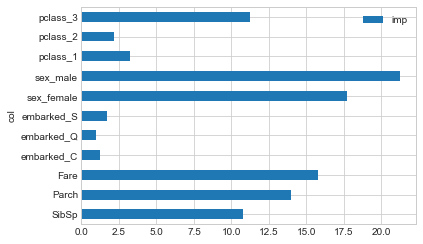

In [141]:
feature_imp.plot(kind='barh',x='col',y='imp')

In [142]:
eval = model.eval_metrics(train_pool,metrics='Precision',plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [143]:
eval = model.eval_metrics(train_pool,metrics='Recall',plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [144]:
eval = model.eval_metrics(train_pool,metrics='F1',plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [145]:
eval = model.eval_metrics(train_pool,metrics='AUC',plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [146]:
X_train.head()

SibSp  Parch     Fare  embarked_C  embarked_Q  embarked_S  sex_female  \
0      1      0   7.2500           0           0           1           0   
1      1      0  71.2833           1           0           0           1   
2      0      0   7.9250           0           0           1           1   
3      1      0  53.1000           0           0           1           1   
4      0      0   8.0500           0           0           1           0   

   sex_male  pclass_1  pclass_2  pclass_3  
0         1         0         0         1  
1         0         1         0         0  
2         0         0         0         1  
3         0         1         0         0  
4         1         0         0         1

In [147]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [148]:
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [149]:
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [150]:
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [151]:
predictions = model.predict(test[wanted_test_columns])

In [152]:
predictions[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [153]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

In [154]:
gender_submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [155]:
len(submission)

418

In [156]:
len(gender_submission)

418

In [157]:
submission.to_csv('../submission.csv', index=False)

In [158]:
submissions_check = pd.read_csv("../submission.csv")
submissions_check.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1